## Final Notebook for Exomars #1 (Hartwick+2022, ApJ)
Input: 3 main simulations, Mars orbit (589 W/m2) passive dust and Earth orbit (1372 W/m2) radiatively active and passive dust
Dust Greenhouse : 1 year simulation active dust (mars and Earth orbit) with opacd_vis, opacd_ir, and opacs_vis, opacs_ir
Tidal Influence: 1 year simulation Earth orbit active dust diurnal average heating and diurnal heating
Varying So: 450, 800, 1000, and 1200 W/m2
Topography: all So, no topography

In [92]:
# import scientific modules
import os
import matplotlib
import matplotlib.pyplot as py
import numpy as np
from matplotlib.cm import get_cmap   #contour color tables
from matplotlib.ticker import MultipleLocator, FuncFormatter #format ticks
#from netCDF4 import Dataset, MFDataset
from numpy import sqrt, exp, max, mean, min, log, log10
import xarray as xr
import warnings; warnings.simplefilter('ignore')
from matplotlib.lines import Line2D

In [93]:
# Get PATH
PATH = os.getcwd()

### 3.1 Passive Dust Simulations at Mars and Earth Orbit

In [97]:
# Inert Dust
dataDIR = '/Users/vhartwic/Documents/codes/VHPlots/Data/Papers/Hartwick+2022_ApJ/fv3_2.0_rmars/fms_mars_pdust/01336.atmos_average_pstd.nc'
DMP = xr.open_dataset(dataDIR, decode_times=False)

# Fixed Topography File
dataDIR = '/Users/vhartwic/Documents/codes/VHPlots/Data/Papers/Hartwick+2022_ApJ/fv3_2.0_rmars/fms_mars_pdust/00000.fixed.nc'
DMP_fixed = xr.open_dataset(dataDIR, decode_times=False)

# Active Dust
dataDIR = '/Users/vhartwic/Documents/codes/VHPlots/Data/Papers/Hartwick+2022_ApJ/fv3_2.1_rearth/fms_mars_pdust/*.atmos_average_pstd.nc' #your file]
DEP = xr.open_mfdataset(dataDIR, decode_times=False, combine='by_coords')


In [98]:
# Save Reference Surface Altitude (TOPO)
topo = DMP_fixed.zsurf

In [99]:
# Define variable C to convert kg/m2/s to g/m2/sol
C = 88775. * 1000 # [kg/m2/s --> g/m2/sol]

# Find Zonal Average of all Vars
DEP_zave = DEP.mean('lon')
DMP_zave = DMP.mean('lon')

# change units of vapor mass to pr-um
dep_zave_vap = np.mean(DEP.vap_mass_micro_col*(1e6/997.0),axis=2)
dmp_zave_vap = np.mean(DMP.vap_mass_micro_col*(1e6/997.0),axis=2)

# Find global average dust optical depth (visible)
# First we need to convert the latitudes to radians
latr = np.deg2rad(DEP.lat)

# Use the cosine of the converted latitudes as weights for the average
weights = np.cos(latr)

# list of variables to prcoess
dep_varlist = [DEP_zave.taudust_VIS, dep_zave_vap, DEP_zave.ts, DEP_zave.ps,DEP_zave.snow, DEP_zave.swflx,DEP_zave.dst_mass_col,
             DEP_zave.dst_mass_col, DEP_zave.dst_mass_source, DEP_zave.stress, DEP_zave.dst_mass_ws_source, DEP_zave.dst_mass_dd_source]
dmp_varlist = [DMP_zave.taudust_VIS, dmp_zave_vap, DMP_zave.ts, DMP_zave.ps,DMP_zave.snow, DMP_zave.swflx,DMP_zave.dst_mass_col,
             DMP_zave.dst_mass_col, DMP_zave.dst_mass_source, DMP_zave.stress,  DMP_zave.dst_mass_ws_source, DMP_zave.dst_mass_dd_source]

dep_globalave, dmp_globalave={},{}

# Then take the weighted average of those using the weights we calculated earlier
for x in range(0,len(dep_varlist)):
        dep_globalave[format(dep_varlist[x].name)]=np.average(dep_varlist[x],axis=1,weights=weights)
        dmp_globalave[format(dmp_varlist[x].name)]=np.average(dmp_varlist[x],axis=1,weights=weights)
    

dep_globalave_temp = np.average(DEP_zave.temp,axis=2,weights=weights)
dmp_globalave_temp = np.average(DMP_zave.temp,axis=2,weights=weights)

#### Figure 1 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


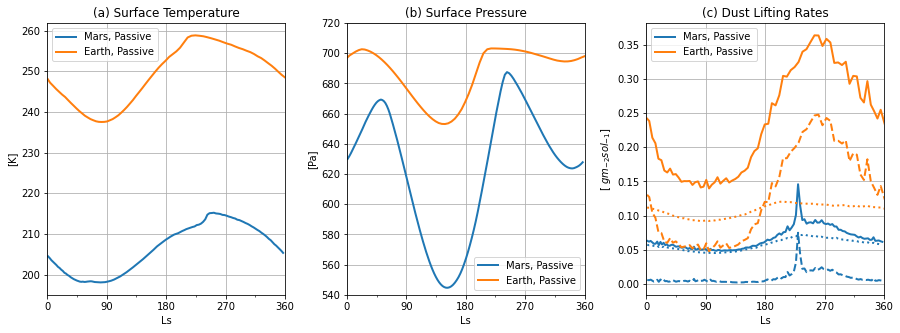

In [100]:
varlist = [dmp_globalave['ts'],dmp_globalave['ps'],
           dmp_globalave['dst_mass_source'],dmp_globalave['dst_mass_ws_source'], dmp_globalave['dst_mass_dd_source'],
           dep_globalave['ts'],dep_globalave['ps'],
           dep_globalave['dst_mass_source'],dep_globalave['dst_mass_ws_source'],
           dep_globalave['dst_mass_dd_source']]

title=['(a) Surface Temperature','(b) Surface Pressure', '(c) Dust Lifting Rates']

unitlist = [ '[K]', '[Pa]', '[$\ gm_{-2}sol_{-1}$]']


fig, axs = py.subplots(1,3, figsize=(15,5))
fig.subplots_adjust(wspace=0.26)
axs = axs.ravel()


for i in range(0,3):
    
    axs[i].set_xlim([0,360])
    axs[i].xaxis.set_major_locator(MultipleLocator(90))
    axs[i].xaxis.set_minor_locator(MultipleLocator(45))
    axs[i].grid(b=None, which='major', axis='both') 
    axs[1].set_ylim([540,720])
    if (i < 2):
        fig = axs[i].plot(DMP.areo-360*2, varlist[i], linewidth=2, label='Mars, Passive')
        fig = axs[i].plot(DEP.areo[67:140]-360, varlist[i+5][67:140], linewidth=2, label='Earth, Passive')

    
    if (i == 2):
        fig = axs[i].plot(DMP.areo-360*2, varlist[i]*C, linewidth=2, label='Mars, Passive')
        fig = axs[i].plot(DEP.areo[67:140]-360, varlist[i+5][67:140]*C, linewidth=2, label='Earth, Passive')

        axs[i].plot(DMP.areo-360*2, varlist[i+1]*C, linewidth=2, color='tab:blue', linestyle='dashed')
        axs[i].plot(DMP.areo-360*2, varlist[i+2]*C, linewidth=2, color='tab:blue', linestyle='dotted')
        axs[i].plot(DEP.areo[67:140]-360, varlist[i+6][67:140]*C, linewidth=2, color='tab:orange', linestyle='dashed')
        axs[i].plot(DEP.areo[67:140]-360, varlist[i+7][67:140]*C, linewidth=2, color='tab:orange', linestyle='dotted')
        
    axs[i].set_ylabel(unitlist[i])
    axs[i].set_title(title[i])
    axs[i].legend()
    axs[i].set_xlabel('Ls')


py.savefig('/Users/vhartwic/Documents/codes/VHPlots/Data/Papers/Hartwick+2022_ApJ/Figures/exomars_fig1.eps',dpi=300)
   

Figure 1: Global average (a) surface temperature [K], (b) surface pressure [Pa] and (c) dust activity [gm-2sol-1] for passive dust simulations at Mars (blue) and Earth (orange) orbits versus time of year (Ls). Dotted lines in panel c show the contribution of dust devil lifting to the total dust mass, dashed lines show wind driven lifting.

#### Figure 2

In [102]:
# Locate cardinal seasons in each year, then concotenate and average variables over all years in each season
# use dictionaries - to call a variable later on use syntax dm_ls90['varname'][:,:]

# first process Mars orbit data
yrs = [1, 2, 3, 4]
ls90, ls180, ls270, ls0 = [], [], [], []
for i in yrs:
    loc90 = np.where(np.logical_and(DMP.areo >= 360*i + 80, DMP.areo <= 360*i + 100.))
    loc180 = np.where(np.logical_and(DMP.areo >= 360*i + 170, DMP.areo <= 360*i + 190.))
    loc270 = np.where(np.logical_and(DMP.areo >= 360*i + 260, DMP.areo <= 360*i + 280.))
    loc0 = np.where(np.logical_and(DMP.areo >= 360*i + 350, DMP.areo <= 360*(i+1) + 10.))
    
    ls90.append(loc90[0])
    ls180.append(loc180[0])
    ls270.append(loc270[0])
    ls0.append(loc0[0])

# rename DMo_zave.ucomp
dmp_varlist = [DMP.stress, DMP.dst_mass_source, DMP.dst_mass_ws_source,
              DMP.taudust_VIS, DMP.dst_mass_col, DMP.swflx, DMP.ts, DMP.ps,
              DMP_zave.temp, DMP_zave.ucomp, DMP_zave.vcomp, DMP_zave.dst_mass_micro, DMP_zave.ice_mass_micro,
              DMP_zave.vap_mass_micro, DMP_zave.dst_num_micro, DMP_zave.swh, DMP_zave.lwh, DMP.snow]

# take average over time (all years)
a,b,c,d = np.concatenate(ls90),np.concatenate(ls180),np.concatenate(ls270),np.concatenate(ls0)
dmp_ls90, dmp_ls180, dmp_ls270, dmp_ls0={},{},{},{}

for x in range(0,len(dmp_varlist)):
        dmp_ls90[format(dmp_varlist[x].name)]=np.mean(dmp_varlist[x][a,:,:],axis=0)
        dmp_ls180[format(dmp_varlist[x].name)]=np.mean(dmp_varlist[x][b,:,:],axis=0)
        dmp_ls270[format(dmp_varlist[x].name)]=np.mean(dmp_varlist[x][c,:,:],axis=0)
        dmp_ls0[format(dmp_varlist[x].name)]=np.mean(dmp_varlist[x][d,:,:],axis=0)

yrs = [1, 2, 3, 4]
ls90, ls180, ls270, ls0 = [], [], [], []
for i in yrs:
    loc90 = np.where(np.logical_and(DMP.areo >= 360*i + 80, DMP.areo <= 360*i + 100.))
    loc180 = np.where(np.logical_and(DMP.areo >= 360*i + 170, DMP.areo <= 360*i + 190.))
    loc270 = np.where(np.logical_and(DMP.areo >= 360*i + 260, DMP.areo <= 360*i + 280.))
    loc0 = np.where(np.logical_and(DMP.areo >= 360*i + 350, DMP.areo <= 360*(i+1) + 10.))
    
    ls90.append(loc90[0])
    ls180.append(loc180[0])
    ls270.append(loc270[0])
    ls0.append(loc0[0])

# rename DMo_zave.ucomp
yrs = [1, 2, 3, 4]
ls90, ls180, ls270, ls0 = [], [], [], []
for i in yrs:
    loc90 = np.where(np.logical_and(DEP.areo >= 360*i + 80, DEP.areo <= 360*i + 100.))
    loc180 = np.where(np.logical_and(DEP.areo >= 360*i + 170, DEP.areo <= 360*i + 190.))
    loc270 = np.where(np.logical_and(DEP.areo >= 360*i + 260, DEP.areo <= 360*i + 280.))
    loc0 = np.where(np.logical_and(DEP.areo >= 360*i + 350, DEP.areo <= 360*(i+1) + 10.))
    
    ls90.append(loc90[0])
    ls180.append(loc180[0])
    ls270.append(loc270[0])
    ls0.append(loc0[0])

# rename DMo_zave.ucomp
dep_varlist = [DEP.stress, DEP.dst_mass_source, DEP.dst_mass_ws_source,
              DEP.taudust_VIS, DEP.dst_mass_col, DEP.swflx, DEP.ts, DEP.ps,
              DEP_zave.temp, DEP_zave.ucomp, DEP_zave.vcomp, DEP_zave.dst_mass_micro, DEP_zave.ice_mass_micro,
              DEP_zave.vap_mass_micro, DEP_zave.dst_num_micro, DEP_zave.swh,DEP_zave.lwh, DEP.snow]

# take average over time (all years)
a,b,c,d = np.concatenate(ls90),np.concatenate(ls180),np.concatenate(ls270),np.concatenate(ls0)
dep_ls90, dep_ls180, dep_ls270, dep_ls0={},{},{},{}

for x in range(0,len(dep_varlist)):
        dep_ls90[format(dep_varlist[x].name)]=np.mean(dep_varlist[x][a,:,:],axis=0)
        dep_ls180[format(dep_varlist[x].name)]=np.mean(dep_varlist[x][b,:,:],axis=0)
        dep_ls270[format(dep_varlist[x].name)]=np.mean(dep_varlist[x][c,:,:],axis=0)
        dep_ls0[format(dep_varlist[x].name)]=np.mean(dep_varlist[x][d,:,:],axis=0)



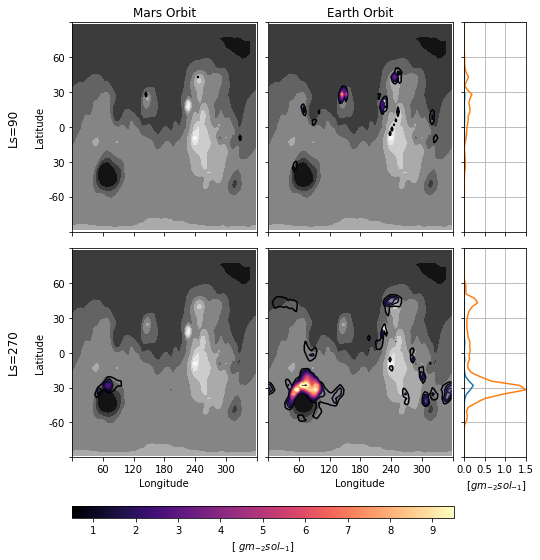

In [104]:
# Solsticial Dust Activity
import matplotlib.colors as mcolors

varlist = [ dmp_ls90['dst_mass_ws_source'],dep_ls90['dst_mass_ws_source'],
          dmp_ls270['dst_mass_ws_source'],dep_ls270['dst_mass_ws_source']]

varlist2 = [ dmp_ls90['dst_mass_ws_source'],dmp_ls270['dst_mass_ws_source'],
            dep_ls90['dst_mass_ws_source'],dep_ls270['dst_mass_ws_source']]


level_lift_passive = np.arange(0.5,10,0.5)

title=['Mars Orbit','Earth Orbit']

fig, axs = py.subplots(2,3, sharey=True, figsize=(10,8),gridspec_kw={'width_ratios': [3, 3, 1]}, constrained_layout=True)
fig.subplots_adjust(left=0.17,wspace=0.08, hspace=0.08,right=0.8)

# axs[row,column]
axs[0,0].set_title(str(title[0]))
axs[0,1].set_title(str(title[1]))
axs[0,0].set_ylabel('Latitude')
axs[1,0].set_ylabel('Latitude')
axs[1,0].set_xlabel('Longitude')
axs[1,1].set_xlabel('Longitude')
axs[1,2].set_xlabel('$\ [gm_{-2}sol_{-1}]$')
axs[0,0].set_xlim([0,360])
axs[0,1].set_xlim([0,360])
axs[0,2].set_xlim([0,1.5])
axs[1,0].set_xlim([0,360])
axs[1,1].set_xlim([0,360])
axs[1,2].set_xlim([0,1.5])
axs[0,0].set_ylim([-90,90])
axs[0,0].yaxis.set_major_locator(MultipleLocator(30))

axs[0,0].set_yticklabels(['','',-60,30,0,30,60,'' ])
axs[1,0].set_yticklabels(['','',-60,30,0,30,60,'' ])
axs[1,0].set_xticklabels(['','',60,120,180,240,300,'' ])
axs[1,1].set_xticklabels(['','',60,120,180,240,300,'' ])

# panel a
axs[0,0].xaxis.set_major_locator(MultipleLocator(60))
axs[0,0].set_xticklabels([])
cs = axs[0,0].contourf(DMP.lon, DMP.lat,topo, cmap=py.cm.Greys_r)
cs = axs[0,0].contour(DMP.lon,DMP.lat, varlist[0]*C,cmap=py.cm.magma, levels=level_lift_passive)

# panel b
axs[0,1].xaxis.set_major_locator(MultipleLocator(60))
axs[0,1].set_xticklabels([])
cs = axs[0,1].contourf(DMP.lon, DMP.lat,topo, cmap=py.cm.Greys_r)
cs = axs[0,1].contour(DMP.lon,DMP.lat, varlist[1]*C,cmap=py.cm.magma, levels=level_lift_passive)

# panel c
axs[0,2].xaxis.set_major_locator(MultipleLocator(0.5))
axs[0,2].set_xticklabels([])
axs[0,2].grid(b=None, which='major', axis='both') 
axs[0,2].plot(varlist[0].mean('lon')*C,DMP.lat, color='tab:blue')
axs[0,2].plot(varlist[1].mean('lon')*C,DMP.lat,color='tab:orange')

# panel d
axs[1,0].xaxis.set_major_locator(MultipleLocator(60))
cs = axs[1,0].contourf(DMP.lon, DMP.lat,topo, cmap=py.cm.Greys_r)
cs = axs[1,0].contour(DMP.lon,DMP.lat, varlist[2]*C,cmap=py.cm.magma, levels=level_lift_passive)

# panel e
axs[1,1].xaxis.set_major_locator(MultipleLocator(60))
cs = axs[1,1].contourf(DMP.lon, DMP.lat,topo, cmap=py.cm.Greys_r)
cs = axs[1,1].contour(DMP.lon,DMP.lat, varlist[3]*C,cmap=py.cm.magma, levels=level_lift_passive)

# panel f
axs[1,2].xaxis.set_major_locator(MultipleLocator(0.5))
axs[1,2].grid(b=None, which='major', axis='both') 
axs[1,2].plot(varlist[2].mean('lon')*C,DMP.lat, color='tab:blue')
axs[1,2].plot(varlist[3].mean('lon')*C,DMP.lat,color='tab:orange')


norm= matplotlib.colors.Normalize(vmin=level_lift_passive.min(), vmax=level_lift_passive.max())
sm = py.cm.ScalarMappable(norm=norm, cmap = cs.cmap)
sm.set_array([])
cbar_ax = py.gcf().add_axes([0.17, 0.02, 0.53, 0.02])
clb = fig.colorbar(sm,  cax=cbar_ax,  orientation='horizontal')
clb.set_label('[$\ gm_{-2}sol_{-1}]$')
#cbar_ax = py.gcf().add_axes([0.17, 0.02, 0.53, 0.02])
#py.colorbar(fig,cax=cbar_ax, orientation='horizontal', /fill)       
#fig.colorbar(level_lift_passive, ax=axs[0,0], shrink=0.6)
    
py.gcf().text(0.08, 0.67, 'Ls=90', fontsize=12, rotation=90)
py.gcf().text(0.08, 0.275, 'Ls=270', fontsize=12, rotation=90)



py.savefig('/Users/vhartwic/Documents/codes/VHPlots/Data/Papers/Hartwick+2022_ApJ/Figures/exomars_fig2.eps',dpi=300)


Figure 2: Solstitial dust wind stress lifting rates [gm-2sol-1] for passive dust simulations at Mars and Earth orbits. Gray contours show the surface topography. Line plots show the zonal average wind stress lifting rates    [gm-2sol-1] for Mars orbit (blue) and Earth orbit (orange).


In [105]:
print(max(dmp_ls270['dst_mass_ws_source'].values))
3.251297e-08*C
print(max(dep_ls270['dst_mass_ws_source'].values))
print(3.251297e-08*C,1.3803772e-07*C)

3.6774974e-08
1.3803772e-07
2.88633891175 12.254298593


#### Figure 3 

In [106]:
# MASS STREAM FUNCTION

# also calculate mass stream function
#constants
pavesfc = 725.0
radius = 3.39E+6
grav = 3.72
pscale = 1

# quick cheaters method to add the plevs dimension to cosy calculation
cosyi = []
for i in range(0,len(DMP.pstd)):
    cosyi += [np.cos(DMP.lat*np.pi/180.)]
cosy = np.stack(cosyi, axis=0)

## NEW METHOD ALERT: o sum with one up or one down in array
# use np.roll to shift array by some amount (e.g -1, shifts 1 left)
# then add or substract from original array 

# scale vertical pressure levels
zoverh = -np.log(np.divide(DMP.pstd,pavesfc))

# difference between pressure level and one above (will be negative)
diffp = np.roll(zoverh,-1)-zoverh

# loop through seasons
dmp_varlist = [dmp_ls90['vcomp'],dmp_ls180['vcomp'],dmp_ls270['vcomp'],dmp_ls0['vcomp']]
dep_varlist = [dep_ls90['vcomp'],dep_ls180['vcomp'],dep_ls270['vcomp'],dep_ls0['vcomp']]

dmp_dictlist = [dmp_ls90, dmp_ls180, dmp_ls270, dmp_ls0]
dep_dictlist = [dep_ls90, dep_ls180, dep_ls270, dep_ls0]

for i in range(0,4):   # loop through seasonso
    
    # scale the zonal average v field by the pressure at each level
    dmp_fl = dmp_varlist[i]*exp(-zoverh)
    dep_fl = dep_varlist[i]*exp(-zoverh)   # v scaled by pressure

    # sum fl with 1 level above
    dmp_sumfl = dmp_fl + np.roll(dmp_fl,-1, axis=0)
    dep_sumfl = dep_fl + np.roll(dep_fl,-1, axis=0)
    

    # scale by pavesfc and find average
    dmp_sumv = 0.5*dmp_sumfl*diffp*pavesfc*pscale*1.e-8
    dep_sumv = 0.5*dep_sumfl*diffp*pavesfc*pscale*1.e-8


    # sum over all levels above
    dmp_vcum = np.nancumsum(dmp_sumv,axis=0)
    dep_vcum = np.nancumsum(dep_sumv,axis=0)


    # calculate mass stream function
    dmp_msf = 2.0*np.pi*radius * cosy / grav * dmp_vcum
    dep_msf = 2.0*np.pi*radius * cosy / grav * dep_vcum
 
    # add to dictionary
    dmp_dictlist[i]['msf'] =dmp_msf
    dep_dictlist[i]['msf'] =dep_msf

    

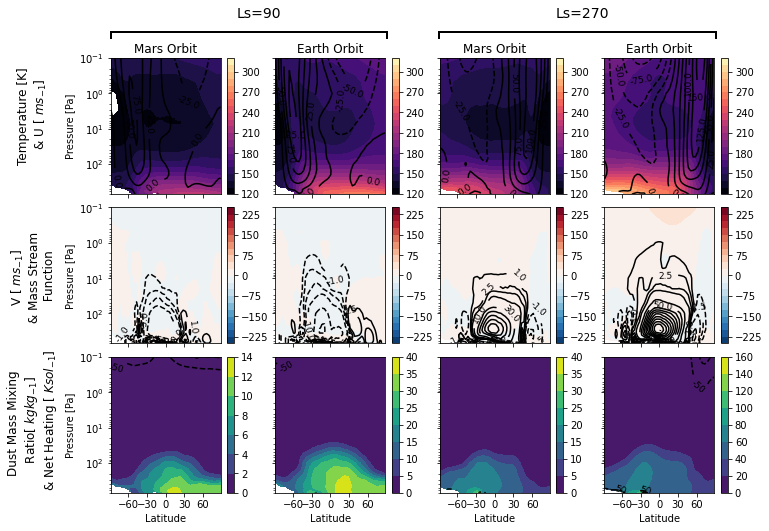

In [107]:
# Large Scale Dynamics (U, MSF)
from matplotlib.lines import Line2D

level_v = [-150,-125,-100,-75,-50,-25,0,25,50,75,100,125,150]
level_v = np.linspace(-225,225,19)
level_v = np.arange(-250,275,25)
level_t = [120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320]

level_d = [0,2.5,5,7.5,10.,12.5,15.,17.5,20.,22.5,25.,27.5,30.,32.5,35.,37.5,40]
level_s = [-1000,-750,-500,-250,-100,-50,50,100,250,500,750,1000]
level_dp = np.arange(0,150,15)

msf_levels = [-250., -230., -210., -190., -170., -150., -130., -110.,  -90.,
        -70.,  -50.,  -30.,  -10., -5., -2.5, -1., 1., 2.5, 5.,  10.,   30.,   50.,   70.,   90.,
        110.,  130.,  150.,  170.,  190.,  210.,  230.,  250.]
levunity = [0, 1, 1000]


varlist = [dmp_ls90['temp'],dep_ls90['temp'], dmp_ls270['temp'],dep_ls270['temp'],
           dmp_ls90['msf'], dep_ls90['msf'], dmp_ls270['msf'],dep_ls270['msf'],
           dmp_ls90['dst_mass_micro'],dep_ls90['dst_mass_micro'],
           dmp_ls270['dst_mass_micro'],dep_ls270['dst_mass_micro']]
varlist2 = [dmp_ls90['ucomp'],dep_ls90['ucomp'],dmp_ls270['ucomp'],dep_ls270['ucomp'],
            dmp_ls90['vcomp'], dep_ls90['vcomp'],dmp_ls270['vcomp'],dep_ls270['vcomp'],
            dmp_ls90['swh'],dep_ls90['swh'],dmp_ls270['swh'],dep_ls270['swh']]
varlist5 = [dep_ls90['lwh'],dep_ls90['lwh'],dmp_ls270['lwh'],dep_ls270['lwh'],
           dep_ls90['lwh'],dep_ls90['lwh'],dmp_ls270['lwh'],dep_ls270['lwh'],
           dep_ls90['lwh'],dep_ls90['lwh'],dmp_ls270['lwh'],dep_ls270['lwh']]


namlist = ['temp','temp','temp','temp',
           'msf','msf', 'msf','msf',
           'mmr','mmr','mmr','mmr']
title=['Mars Orbit', 'Earth Orbit','Mars Orbit', 'Earth Orbit']

fig, axs = py.subplots(3,4, sharex=True, sharey=True, figsize=(12,8))
#axs = axs.ravel()
fig.subplots_adjust(left=0.17,hspace=0.1)

for i in range(0,12):

    axs[0,0].set_yscale('log')
    axs[0,0].set_ylim([700,1e-1])
    axs[0,0].xaxis.set_major_locator(MultipleLocator(30))
    axs[0,0].set_ylabel('Pressure [Pa]')
    axs[1,0].set_ylabel('Pressure [Pa]')
    axs[2,0].set_ylabel('Pressure [Pa]')
    
    
    if namlist[i][-4:] =='temp':
        cs = axs[0,i].contourf(DEP.lat, DEP.pstd,varlist[i],cmap=py.cm.magma, levels=level_t)
        py.colorbar(cs,ax=axs[0,i])
        cs = axs[0,i].contour(DEP.lat, DEP.pstd, varlist2[i],np.linspace(-225,225,19),colors='k')
        py.clabel(cs, fontsize=9,inline=1,fmt='%1.1f', colors='black')
        
    if namlist[i][-3:] == "msf":   # use RdBu contours for any fields ending in comp (eg ucomp, vcomp)
        cs = axs[1,i-4].contourf(DEP.lat, DEP.pstd, varlist2[i],cmap=py.cm.RdBu_r, levels=level_v)
        py.colorbar(cs,ax=axs[1,i-4])
        cs = axs[1,i-4].contour(DEP.lat, DEP.pstd, varlist[i]*-1.,np.linspace(-250,250,26), levels=msf_levels,colors='k')
        py.clabel(cs, fontsize=9,inline=1,fmt='%1.1f')

    if namlist[i][-3:] == "mmr":   # use RdBu contours for any fields ending in comp (eg ucomp, vcomp)
        cs = axs[2,i-8].contourf(DEP.lat, DEP.pstd, varlist[i]*1e6,cmap=py.cm.viridis)
        py.colorbar(cs,ax=axs[2,i-8])
        cs = axs[2,i-8].contour(DEP.lat,DEP.pstd,(varlist2[i]+varlist5[i])*88775,np.linspace(-500,500,10),levels=level_s,colors='k') 
        py.clabel(cs, fontsize=9,inline=1,fmt='%1.f')
    if i <= 3:
        axs[0,i].set_title(str(title[i]))
    
    if i >= 8:
        axs[2,i-8].set_xlabel('Latitude')
    
py.gcf().text(0.08, 0.78, 'Temperature [K]\n & U [$\ ms_{-1}$]', fontsize=12, rotation=90, ha='center', va='center')
py.gcf().text(0.08, 0.5, 'V [$\ ms_{-1}$]\n & Mass Stream \n Function', fontsize=12, rotation=90,ha='center', va='center')
py.gcf().text(0.08, 0.25, 'Dust Mass Mixing \n Ratio[$\ kgkg_{-1}$]\n & Net Heating [$\ Ksol_{-1}$]', fontsize=12, rotation=90,ha='center', va='center')
py.gcf().text(0.315, 0.95, 'Ls=90', fontsize=14)
py.gcf().text(0.685, 0.95, 'Ls=270', fontsize=14)

# Bracket Ls90
x,y= np.array([0.17,0.49]), np.array([0.925,0.925])
line = Line2D(x, y, lw=2., color='k')
fig.add_artist(line)
x,y= np.array([0.17,0.17]), np.array([0.915,0.925])
line = Line2D(x, y, lw=2., color='k')
fig.add_artist(line)
x,y= np.array([0.49,0.49]), np.array([0.915,0.925])
line = Line2D(x, y, lw=2., color='k')
fig.add_artist(line)

# Bracket Ls270
x,y= np.array([0.55,0.87]), np.array([0.925,0.925])
line = Line2D(x, y, lw=2., color='k')
fig.add_artist(line)
x,y= np.array([0.55,0.55]), np.array([0.915,0.925])
line = Line2D(x, y, lw=2., color='k')
fig.add_artist(line)
x,y= np.array([0.87,0.87]), np.array([0.915,0.925])
line = Line2D(x, y, lw=2., color='k')
fig.add_artist(line)


py.savefig('/Users/vhartwic/Documents/codes/VHPlots/Data/Papers/Hartwick+2022_ApJ/Figures/exomars_fig3.eps',dpi=300)


Figure 3:  Comparison of the solsticial zonal mean circulation versus pressure in passive simulations at Mars and Earth orbits. (row 1) temperature [K] (filled contours) and zonal wind [m/s] (contour lines) (row 2) meridional wind [ms-1] (filled contours) and mass stream function [kgm-2s-1 x 108] (contour lines) (row 3) dust mass mixing ratio [kgkg-1 x 106] (filled contours) and the net heating rate [Ksol-1] (contour lines)

### Section 3.2 Active and Passive Dust Simulations at Earth Orbit 

In [108]:
# Inert Dust, Earth Orbit
dataDIR = '/Users/vhartwic/Documents/codes/VHPlots/Data/Papers/Hartwick+2022_ApJ/fv3_2.1_rearth/fms_mars_pdust/*.atmos_average_pstd.nc' #your file]
DEP = xr.open_mfdataset(dataDIR, decode_times=False, combine='by_coords')

# Active Dust, Earth Orbit
dataDIR = '/Users/vhartwic/Documents/codes/VHPlots/Data/Papers/Hartwick+2022_ApJ/fv3_2.1_rearth/fms_mars_nocloud/*.atmos_average_plevs.nc' #your file]
DER = xr.open_mfdataset(dataDIR, decode_times=False, combine='by_coords')
DER = DER.rename({'plevs': 'pstd'})


In [110]:
# Find Zonal Average of all Vars
DER_zave = DER.mean('lon')
DEP_zave = DEP.mean('lon')

# change units of vapor mass to pr-um
der_zave_vap = np.mean(DER.vap_mass_micro_col*(1e6/997.0),axis=2)
dep_zave_vap = np.mean(DEP.vap_mass_micro_col*(1e6/997.0),axis=2)


# Find global average dust optical depth (visible)
# First we need to convert the latitudes to radians
latr = np.deg2rad(DER.lat)

# Use the cosine of the converted latitudes as weights for the average
weights = np.cos(latr)

# list of variables to prcoess
der_varlist = [DER_zave.taudust_VIS, der_zave_vap, DER_zave.ts, DER_zave.ps,DER_zave.snow, DER_zave.swflx,
               DER_zave.dst_mass_col,DER_zave.dst_mass_col, DER_zave.dst_mass_source, DER_zave.stress, 
               DER_zave.dst_mass_ws_source, DER_zave.dst_mass_dd_source]
dep_varlist = [DEP_zave.taudust_VIS, dep_zave_vap, DEP_zave.ts, DEP_zave.ps,DEP_zave.snow, DEP_zave.swflx,
               DEP_zave.dst_mass_col,DEP_zave.dst_mass_col, DEP_zave.dst_mass_source, DEP_zave.stress, 
               DEP_zave.dst_mass_ws_source, DEP_zave.dst_mass_dd_source]

der_globalave, dep_globalave={},{}

# Then take the weighted average of those using the weights we calculated earlier
for x in range(0,len(der_varlist)):
        der_globalave[format(der_varlist[x].name)]=np.average(der_varlist[x],axis=1,weights=weights)
        dep_globalave[format(dep_varlist[x].name)]=np.average(dep_varlist[x],axis=1,weights=weights)
    

der_globalave_temp = np.average(DER_zave.temp,axis=2,weights=weights)
dep_globalave_temp = np.average(DEP_zave.temp,axis=2,weights=weights)


#### Figure 4

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


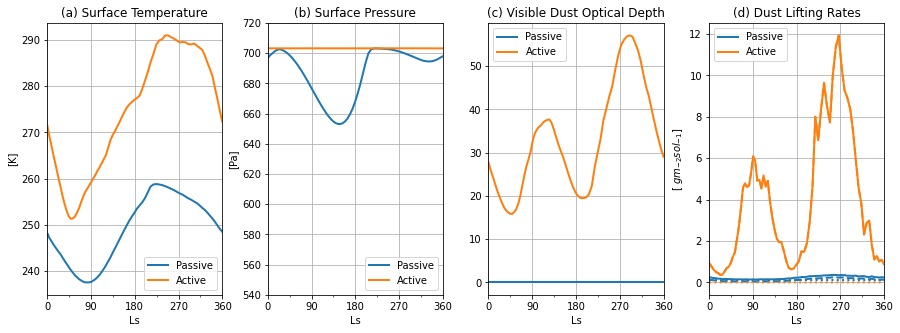

In [111]:
varlist = [dep_globalave['ts'],dep_globalave['ps'],dep_globalave['dst_mass_col'], 
           dep_globalave['dst_mass_source'],dep_globalave['dst_mass_ws_source'], dep_globalave['dst_mass_dd_source'],
           der_globalave['ts'],der_globalave['ps'],der_globalave['dst_mass_col'],
           der_globalave['dst_mass_source'],der_globalave['dst_mass_ws_source'],
           der_globalave['dst_mass_dd_source']]

varlist = [dep_globalave['ts'],dep_globalave['ps'],dep_globalave['taudust_VIS'], 
           dep_globalave['dst_mass_source'],dep_globalave['dst_mass_ws_source'], dep_globalave['dst_mass_dd_source'],
           der_globalave['ts'],der_globalave['ps'],der_globalave['taudust_VIS'],
           der_globalave['dst_mass_source'],der_globalave['dst_mass_ws_source'],
           der_globalave['dst_mass_dd_source']]

title=['(a) Surface Temperature','(b) Surface Pressure','(c) Visible Dust Optical Depth', '(d) Dust Lifting Rates']

unitlist = [ '[K]', '[Pa]',' ', '[$\ gm_{-2}sol_{-1}$]']


fig, axs = py.subplots(1,4, figsize=(15,5))
fig.subplots_adjust(wspace=0.26)
axs = axs.ravel()


for i in range(0,4):
    
    axs[i].set_xlim([0,360])
    axs[i].xaxis.set_major_locator(MultipleLocator(90))
    axs[i].xaxis.set_minor_locator(MultipleLocator(45))
    axs[i].grid(b=None, which='major', axis='both')
    axs[1].set_ylim([540,720])
    
    if (i < 3):
        fig = axs[i].plot(DEP.areo[67:140]-360, varlist[i][67:140], linewidth=2, label='Passive')
        fig = axs[i].plot(DER.areo[67:140]-360, varlist[i+6][67:140], linewidth=2, label='Active')
    
    if (i == 3):
        C  = 1000 * 88640
        fig = axs[i].plot(DEP.areo[67:140]-360, varlist[i][67:140]*C, linewidth=2, label='Passive')
        fig = axs[i].plot(DER.areo[67:140]-360, varlist[i+6][67:140]*C, linewidth=2, label='Active')
        axs[i].plot(DEP.areo[67:140]-360, varlist[i+1][67:140]*C, linewidth=2, color='tab:blue', linestyle='dashed')
        axs[i].plot(DEP.areo[67:140]-360, varlist[i+2][67:140]*C, linewidth=2, color='tab:blue', linestyle='dotted')
        axs[i].plot(DER.areo[67:140]-360, varlist[i+7][67:140]*C, linewidth=2, color='tab:orange', linestyle='dashed')
        axs[i].plot(DER.areo[67:140]-360, varlist[i+8][67:140]*C, linewidth=2, color='tab:orange', linestyle='dotted')
    
    if (i< 2):
        axs[i].legend(loc='lower right')
    if (i >= 2):
        axs[i].legend(loc='upper left')
    axs[i].set_ylabel(unitlist[i])
    axs[i].set_title(title[i])

    axs[i].set_xlabel('Ls')

py.savefig('/Users/vhartwic/Documents/codes/VHPlots/Data/Papers/Hartwick+2022_ApJ/Figures/exomars_fig4.eps',dpi=300)

        

Figure 4: (as in Figure 1) Global average (a) surface temperature [K], (b), surface pressure [Pa], (c) visible dust optical depth, and (d) dust lifting rates [gm-2sol-1] versus time of year (Ls) for passive (blue) and active (orange) dust simulations at Earth orbit. Dotted lines in panel d show the contribution of dust devil lifting to the total dust mass, dashed lines show wind driven lifting.

### 3.3 The Dust Greenhouse

#### Figure 5

In [112]:
# load year 5 radiation sims, use native levels 
# Earth Orbit, Inert Dust
dataDIR = '/Users/vhartwic/Documents/codes/VHPlots/Data/Papers/Hartwick+2022_ApJ/fv3_2.1_rearth/fms_mars_pdust/01800_albedo_pdust_tmp2.nc' #your file]
DPA = xr.open_dataset(dataDIR, decode_times=False)

# EArth Orbit, Active Dust
dataDIR = '/Users/vhartwic/Documents/codes/VHPlots/Data/Papers/Hartwick+2022_ApJ/fv3_2.1_rearth/fms_mars_nocloud/01800_albedo_atmosave_pstd.nc' #your file]
DRA = xr.open_dataset(dataDIR, decode_times=False)

# Mars Orbit, Active Dust
dataDIR = '/Users/vhartwic/Documents/codes/VHPlots/Data/Papers/Hartwick+2022_ApJ/fv3_2.0_rmars/fms_mars_nocloud/03340_albedo_atmosave_pstd3.nc' #your file]
DMRA = xr.open_dataset(dataDIR, decode_times=False)

In [113]:
# Calculate Bond Albedo (60N, 60S)
der_ba = DRA.flx_vuptop.sel(lat=slice(-47 ,47))/DRA.flx_vdntop.sel(lat=slice(-47,47))
dmr_ba = DMRA.flx_vuptop.sel(lat=slice(-47,47))/DMRA.flx_vdntop.sel(lat=slice(-47,47))
dep_ba = DPA.flx_vuptop.sel(lat=slice(-47,47))/DPA.flx_vdntop.sel(lat=slice(-47,47))

der_ba_zave = der_ba.mean('lon')
dmr_ba_zave = dmr_ba.mean('lon')
dep_ba_zave = dep_ba.mean('lon')


# name it
der_ba_zave.name = 'der_ba'
dmr_ba_zave.name = 'dmr_ba'
dep_ba_zave.name = 'dep_ba'


In [114]:
# find global averages
# Find Zonal Average of all Vars
DPA_zave = DPA.mean('lon')
DRA_zave = DRA.mean('lon')
DMRA_zave = DMRA.mean('lon')

# First we need to convert the latitudes to radians
latr = np.deg2rad(DRA.lat)

# Use the cosine of the converted latitudes as weights for the average
weights = np.cos(latr)


# list of variables to prcoess
dpa_varlist = [DPA_zave.flx_iruptop, DPA_zave.flx_irdntop, DPA_zave.flx_vuptop, DPA_zave.flx_vdntop,
             DPA_zave.flx_irupsfc, DPA_zave.flx_irdnsfc, DPA_zave.flx_vupsfc, DPA_zave.flx_vdnsfc]
dra_varlist = [DRA_zave.flx_iruptop, DRA_zave.flx_irdntop, DRA_zave.flx_vuptop, DRA_zave.flx_vdntop,
             DRA_zave.flx_irupsfc, DRA_zave.flx_irdnsfc, DRA_zave.flx_vupsfc, DRA_zave.flx_vdnsfc]
dmra_varlist = [DMRA_zave.flx_iruptop, DMRA_zave.flx_irdntop, DMRA_zave.flx_vuptop, DMRA_zave.flx_vdntop,
             DMRA_zave.flx_irupsfc, DMRA_zave.flx_irdnsfc, DMRA_zave.flx_vupsfc, DMRA_zave.flx_vdnsfc]
dpa_globalave, dra_globalave, dmra_globalave ={},{}, {}

# Then take the weighted average of those using the weights we calculated earlier
for x in range(0,len(dpa_varlist)):
        dpa_globalave[format(dpa_varlist[x].name)]=np.average(dpa_varlist[x],axis=1,weights=weights)     
        dra_globalave[format(dra_varlist[x].name)]=np.average(dra_varlist[x],axis=1,weights=weights)    
        dmra_globalave[format(dmra_varlist[x].name)]=np.average(dmra_varlist[x],axis=1,weights=weights)
        
dra_globalave[format(DRA_zave.taudust_VIS.name)]=np.average(DRA_zave.taudust_VIS,axis=1,weights=weights)
dra_globalave[format(DRA_zave.temp.name)]=np.average(DRA_zave.temp,axis=2,weights=weights)
dra_globalave[format(DRA_zave.opacd_ir.name)]=np.average(DRA_zave.opacd_ir,axis=2,weights=weights)
dra_globalave[format(DRA_zave.opacd_v.name)]=np.average(DRA_zave.opacd_v,axis=2,weights=weights)
dra_globalave[format(DRA_zave.ts.name)]=np.average(DRA_zave.ts,axis=1,weights=weights)

dmra_globalave[format(DMRA_zave.taudust_VIS.name)]=np.average(DMRA_zave.taudust_VIS,axis=1,weights=weights)
dmra_globalave[format(DMRA_zave.temp.name)]=np.average(DMRA_zave.temp,axis=2,weights=weights)
dmra_globalave[format(DMRA_zave.opacd_ir.name)]=np.average(DMRA_zave.opacd_ir,axis=2,weights=weights)
dmra_globalave[format(DMRA_zave.opacd_v.name)]=np.average(DMRA_zave.opacd_v,axis=2,weights=weights)

            
# weights for 75S-75N    
latr = np.deg2rad(DRA.lat.sel(lat=slice(-47,47)))
weights = np.cos(latr)
dmra_globalave[format(dmr_ba_zave.name)]=np.average(dmr_ba_zave,axis=1,weights=weights)
dra_globalave[format(der_ba_zave.name)]=np.average(der_ba_zave,axis=1,weights=weights)

               

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


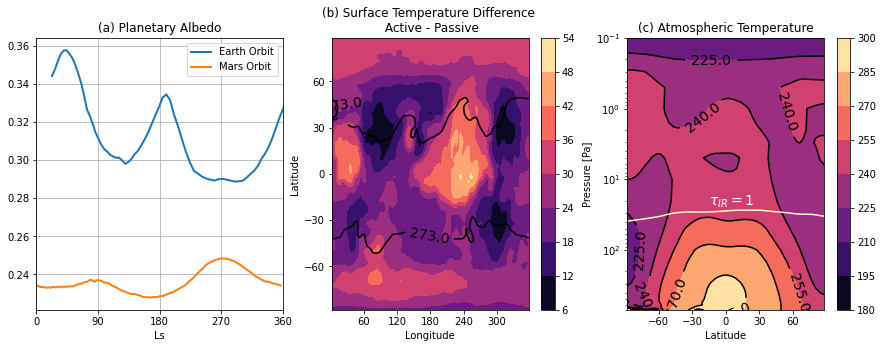

In [115]:
areo = DPA.areo[:,0] - 360*5        
areo_mars = DMRA.areo[:,0] - 360*5  

der_annualave_ts = np.mean(DER.ts[67:140,:,:],axis=0)
dep_annualave_ts = np.mean(DEP.ts[67:140,:,:],axis=0)
zave_temp = np.mean(DER_zave.temp[67:140,:,:],axis=0)
fig, ([ax1,ax3,ax2]) = py.subplots(1,3, figsize=(15,5))

tmp= DRA_zave.opacd_v.mean('time')
tmp_ir = DRA_zave.opacd_ir.mean('time')

zave_opacdv_cum = np.nancumsum(tmp, axis=0)
zave_opacdir_cum = np.nancumsum(tmp_ir,axis=0)
zave_temp = DRA_zave.temp.mean('time')

# define important contour levels
freezingpt = [0,273,1000]
tau_unity = [0,1,1000]
ax1.xaxis.set_major_locator(MultipleLocator(90))
fig = ax1.plot(areo, dra_globalave['der_ba'], linewidth=2, label='Earth Orbit')
ax1.plot(areo_mars, dmra_globalave['dmr_ba'], linewidth=2, label='Mars Orbit')
ax1.grid(b=None, which='major', axis='both') 
ax1.set_xlabel('Ls')
ax1.legend()
ax1.set_title('(a) Planetary Albedo')
ax1.set_xlim([0,360])


ax3.set_xlabel('Longitude')
ax3.set_ylabel('Latitude')
ax3.set_title('(b) Surface Temperature Difference \n Active - Passive')
ax3.xaxis.set_major_locator(MultipleLocator(60))
ax3.yaxis.set_major_locator(MultipleLocator(30))
fig = ax3.contourf(DRA.lon, DRA.lat, der_annualave_ts-dep_annualave_ts, cmap=py.cm.magma)
py.colorbar(fig,ax=ax3)
fig = ax3.contour(DRA.lon, DRA.lat, der_annualave_ts, colors='black', levels=freezingpt)
py.clabel(fig, fontsize=14,inline=1, colors='black',fmt='%1.1f')


ax2.set_yscale('log')
ax2.set_ylim([700,1e-1])
ax2.set_ylabel('Pressure [Pa]')
ax2.set_xlabel('Latitude')

ax2.xaxis.set_major_locator(MultipleLocator(30))
fig = ax2.contourf(DRA.lat, DRA.pstd, zave_temp, cmap=py.cm.magma)
py.colorbar(fig,ax=ax2)
fig = ax2.contour(DRA.lat, DRA.pstd, zave_temp, colors='black')
py.clabel(fig, fontsize=14,inline=1, colors='black',fmt='%1.1f')
fig = ax2.contour(DRA.lat, DRA.pstd, zave_opacdir_cum, levels=tau_unity, cmap=py.cm.magma_r)
#fig = ax2.contour(DRA.lat, DRA.pstd, zave_opacdv_cum, levels=tau_unity, cmap=py.cm.magma_r, linestyles='--')
ax2.set_title('(c) Atmospheric Temperature')
ax2.annotate(r'$\tau_{IR} = 1$', (-15, 23),color='white',size=14)


py.savefig('/Users/vhartwic/Documents/codes/VHPlots/Data/Papers/Hartwick+2022_ApJ/Figures/exomars_fig5.eps',dpi=300)




Figure 5: (a) planetary albedo for a land planet with radiatively active dust versus time of year (Ls) at Mars orbit compared with Earth orbit, (b) annual average surface temperature difference [K] between active and passive dust simulations at Earth orbit, (c) annual average atmospheric temperatures vs pressure for the Earth orbit, active dust simulations. The 273K surface temperature contour is indicated in black in panel b. The IR emission to space level, the level where the top down cumulative IR optical depth reaches unity, is represented by the solid line in panel c.

### 3.4 Dust Radiative Effects on Selected Components of the General Circulation

### 3.4.1 The Zonal Mean Circulation

In [117]:
# Locate cardinal seasons in each year, then concotenate and average variables over all years in each season
# use dictionaries - to call a variable later on use syntax dm_ls90['varname'][:,:]

# process Earth rad
yrs=[1,2,3,4]
ls90, ls180, ls270, ls0 = [], [], [], []
for i in yrs:
    loc90 = np.where(np.logical_and(DER.areo >= 360*i + 80, DER.areo <= 360*i + 100.))
    loc180 = np.where(np.logical_and(DER.areo >= 360*i + 170, DER.areo <= 360*i + 190.))
    loc270 = np.where(np.logical_and(DER.areo >= 360*i + 260, DER.areo <= 360*i + 280.))
    loc0 = np.where(np.logical_and(DER.areo >= 360*i + 350, DER.areo <= 360*(i+1) + 10.))
    
    ls90.append(loc90[0])
    ls180.append(loc180[0])
    ls270.append(loc270[0])
    ls0.append(loc0[0])

# rename DMo_zave.ucomp
der_varlist = [DER.stress, DER.dst_mass_source, DER.dst_mass_ws_source, DER.dst_mass_dd_source,
              DER.taudust_VIS, DER.dst_mass_col, DER.swflx, DER.ts, DER.ps,
              DER_zave.temp, DER_zave.ucomp, DER_zave.vcomp, DER_zave.dst_mass_micro, DER_zave.ice_mass_micro,
              DER_zave.vap_mass_micro, DER_zave.dst_num_micro, DER_zave.swh, DER_zave.lwh, DER.snow]

# take average over time (all years)
a,b,c,d = np.concatenate(ls90),np.concatenate(ls180),np.concatenate(ls270),np.concatenate(ls0)
der_ls90, der_ls180, der_ls270, der_ls0={},{},{},{}

for x in range(0,len(der_varlist)):
        der_ls90[format(der_varlist[x].name)]=np.mean(der_varlist[x][a,:,:],axis=0)
        der_ls180[format(der_varlist[x].name)]=np.mean(der_varlist[x][b,:,:],axis=0)
        der_ls270[format(der_varlist[x].name)]=np.mean(der_varlist[x][c,:,:],axis=0)
        der_ls0[format(der_varlist[x].name)]=np.mean(der_varlist[x][d,:,:],axis=0)


In [118]:
# MASS STREAM FUNCTION

# also calculate mass stream function
#constants
pavesfc = 725.0
radius = 3.39E+6
grav = 3.72
pscale = 1

# quick cheaters method to add the plevs dimension to cosy calculation
cosyi = []
for i in range(0,len(DER.pstd)):
    cosyi += [np.cos(DER.lat*np.pi/180.)]
cosy = np.stack(cosyi, axis=0)

## NEW METHOD ALERT: to sum with one up or one down in array
# use np.roll to shift array by some amount (e.g -1, shifts 1 left)
# then add or substract from original array 

# scale vertical pressure levels
zoverh = -np.log(np.divide(DEP.pstd,pavesfc))

# difference between pressure level and one above (will be negative)
diffp = np.roll(zoverh,-1)-zoverh

# loop through seasons
dep_varlist = [dep_ls90['vcomp'],dep_ls180['vcomp'],dep_ls270['vcomp'],dep_ls0['vcomp']]
der_varlist = [der_ls90['vcomp'],der_ls180['vcomp'],der_ls270['vcomp'],der_ls0['vcomp']]

dep_dictlist = [dep_ls90, dep_ls180, dep_ls270, dep_ls0]
der_dictlist = [der_ls90, der_ls180, der_ls270, der_ls0]

for i in range(0,4):   # loop through seasonso
    
    # scale the zonal average v field by the pressure at each level
    dep_fl = dep_varlist[i]*exp(-zoverh)
    der_fl = der_varlist[i]*exp(-zoverh)   # v scaled by pressure

    # sum fl with 1 level above
    dep_sumfl = dep_fl + np.roll(dep_fl,-1, axis=0)
    der_sumfl = der_fl + np.roll(der_fl,-1, axis=0)
    

    # scale by pavesfc and find average
    dep_sumv = 0.5*dep_sumfl*diffp*pavesfc*pscale*1.e-8
    der_sumv = 0.5*der_sumfl*diffp*pavesfc*pscale*1.e-8


    # sum over all levels above
    dep_vcum = np.nancumsum(dep_sumv,axis=0)
    der_vcum = np.nancumsum(der_sumv,axis=0)


    # calculate mass stream function
    dep_msf = 2.0*np.pi*radius * cosy / grav * dep_vcum
    der_msf = 2.0*np.pi*radius * cosy / grav * der_vcum
 
    # add to dictionary
    dep_dictlist[i]['msf'] =dep_msf
    der_dictlist[i]['msf'] =der_msf

    

#### Figure 6

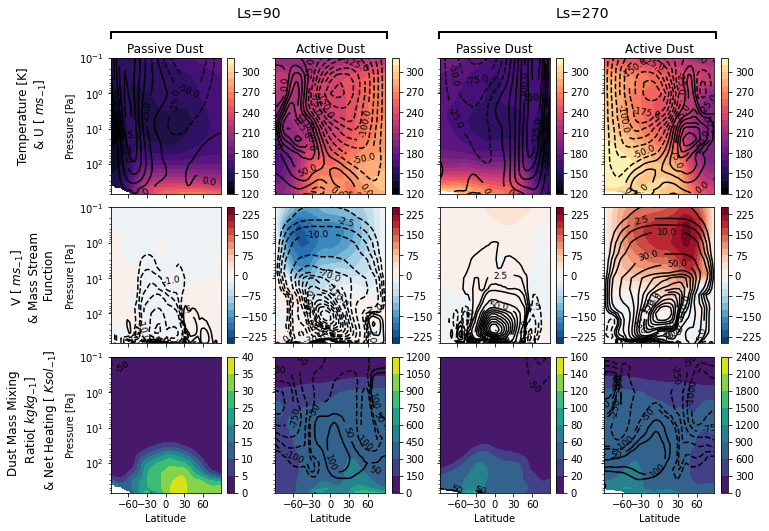

In [119]:
# Large Scale Dynamics (U, MSF)
from matplotlib.lines import Line2D

level_v = [-150,-125,-100,-75,-50,-25,0,25,50,75,100,125,150]
level_v = np.linspace(-225,225,19)
level_v = np.arange(-250,275,25)
level_t = [120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320]

level_d = [0,2.5,5,7.5,10.,12.5,15.,17.5,20.,22.5,25.,27.5,30.,32.5,35.,37.5,40]
level_s = [-1000,-750,-500,-250,-100,-50,50,100,250,500,750,1000]
level_dp = np.arange(0,150,15)

msf_levels = [-250., -230., -210., -190., -170., -150., -130., -110.,  -90.,
        -70.,  -50.,  -30.,  -10., -5., -2.5, -1., 1., 2.5, 5.,  10.,   30.,   50.,   70.,   90.,
        110.,  130.,  150.,  170.,  190.,  210.,  230.,  250.]
levunity = [0, 1, 1000]


varlist = [dep_ls90['temp'],der_ls90['temp'], dep_ls270['temp'],der_ls270['temp'],
           dep_ls90['msf'], der_ls90['msf'], dep_ls270['msf'],der_ls270['msf'],
           dep_ls90['dst_mass_micro'],der_ls90['dst_mass_micro'],
           dep_ls270['dst_mass_micro'],der_ls270['dst_mass_micro']]
varlist2 = [dep_ls90['ucomp'],der_ls90['ucomp'],dep_ls270['ucomp'],der_ls270['ucomp'],
            dep_ls90['vcomp'], der_ls90['vcomp'],dep_ls270['vcomp'],der_ls270['vcomp'],
            dep_ls90['swh'],der_ls90['swh'],dep_ls270['swh'],der_ls270['swh']]

varlist4 = [dep_ls90['swh'],der_ls90['swh'],dep_ls270['swh'],der_ls270['swh'],
            dep_ls90['swh'],der_ls90['swh'],dep_ls270['swh'],der_ls270['swh'],
            dep_ls90['swh'],der_ls90['swh'],dep_ls270['swh'],der_ls270['swh']]
varlist5 = [dep_ls90['lwh'],der_ls90['lwh'],dep_ls270['lwh'],der_ls270['lwh'],
           dep_ls90['lwh'],der_ls90['lwh'],dep_ls270['lwh'],der_ls270['lwh'],
           dep_ls90['lwh'],der_ls90['lwh'],dep_ls270['lwh'],der_ls270['lwh']]

namlist = ['temp','temp','temp','temp',
           'msf','msf', 'msf','msf',
           'mmr','mmr','mmr','mmr']
title=['Passive Dust', 'Active Dust','Passive Dust','Active Dust']

fig, axs = py.subplots(3,4, sharex=True, sharey=True, figsize=(12,8))
#axs = axs.ravel()
fig.subplots_adjust(left=0.17,hspace=0.1)

for i in range(0,12):

    axs[0,0].set_yscale('log')
    axs[0,0].set_ylim([700,1e-1])
    axs[0,0].xaxis.set_major_locator(MultipleLocator(30))
    axs[0,0].set_ylabel('Pressure [Pa]')
    axs[1,0].set_ylabel('Pressure [Pa]')
    axs[2,0].set_ylabel('Pressure [Pa]')
    
    
    if namlist[i][-4:] =='temp':
        cs = axs[0,i].contourf(DEP.lat, DEP.pstd,varlist[i],cmap=py.cm.magma, levels=level_t)
        py.colorbar(cs,ax=axs[0,i])
        cs = axs[0,i].contour(DEP.lat, DEP.pstd, varlist2[i],np.linspace(-225,225,19),colors='k')
        py.clabel(cs, fontsize=9,inline=1,fmt='%1.1f', colors='black')
        
    if namlist[i][-3:] == "msf":   # use RdBu contours for any fields ending in comp (eg ucomp, vcomp)
        cs = axs[1,i-4].contourf(DEP.lat, DEP.pstd, varlist2[i],cmap=py.cm.RdBu_r, levels=level_v)
        py.colorbar(cs,ax=axs[1,i-4])
        cs = axs[1,i-4].contour(DEP.lat, DEP.pstd, varlist[i]*-1.,np.linspace(-250,250,26), levels=msf_levels,colors='k')
        py.clabel(cs, fontsize=9,inline=1,fmt='%1.1f')

    if namlist[i][-3:] == "mmr":   # use RdBu contours for any fields ending in comp (eg ucomp, vcomp)
        cs = axs[2,i-8].contourf(DEP.lat, DEP.pstd, varlist[i]*1e6,cmap=py.cm.viridis)
        py.colorbar(cs,ax=axs[2,i-8])
        cs = axs[2,i-8].contour(DEP.lat,DEP.pstd,(varlist2[i]+varlist5[i])*88775,np.linspace(-500,500,10),levels=level_s,colors='k') 
        py.clabel(cs, fontsize=9,inline=1,fmt='%1.f')
    if i <= 3:
        axs[0,i].set_title(str(title[i]))
    
    if i >= 8:
        axs[2,i-8].set_xlabel('Latitude')
    
py.gcf().text(0.08, 0.78, 'Temperature [K]\n & U [$\ ms_{-1}$]', fontsize=12, rotation=90, ha='center', va='center')
py.gcf().text(0.08, 0.5, 'V [$\ ms_{-1}$]\n & Mass Stream \n Function', fontsize=12, rotation=90,ha='center', va='center')
py.gcf().text(0.08, 0.25, 'Dust Mass Mixing \n Ratio[$\ kgkg_{-1}$]\n & Net Heating [$\ Ksol_{-1}$]', fontsize=12, rotation=90,ha='center', va='center')
py.gcf().text(0.315, 0.95, 'Ls=90', fontsize=14)
py.gcf().text(0.685, 0.95, 'Ls=270', fontsize=14)

# Bracket Ls90
x,y= np.array([0.17,0.49]), np.array([0.925,0.925])
line = Line2D(x, y, lw=2., color='k')
fig.add_artist(line)
x,y= np.array([0.17,0.17]), np.array([0.915,0.925])
line = Line2D(x, y, lw=2., color='k')
fig.add_artist(line)
x,y= np.array([0.49,0.49]), np.array([0.915,0.925])
line = Line2D(x, y, lw=2., color='k')
fig.add_artist(line)

# Bracket Ls270
x,y= np.array([0.55,0.87]), np.array([0.925,0.925])
line = Line2D(x, y, lw=2., color='k')
fig.add_artist(line)
x,y= np.array([0.55,0.55]), np.array([0.915,0.925])
line = Line2D(x, y, lw=2., color='k')
fig.add_artist(line)
x,y= np.array([0.87,0.87]), np.array([0.915,0.925])
line = Line2D(x, y, lw=2., color='k')
fig.add_artist(line)

py.savefig('/Users/vhartwic/Documents/codes/VHPlots/Data/Papers/Hartwick+2022_ApJ/Figures/exomars_fig6.eps',dpi=300)


Figure 6: Comparison of the solsticial zonal mean circulation versus pressure in passive and active dust simulations. (row 1) temperature [K] (filled contours) and zonal wind [m/s] (contour lines) (row 2) meridional wind [ms-1] (filled contours) and mass stream function [kgm-2s-1 x 108] (contour lines) (row 3) dust mass mixing ratio [kgkg-1 x 106] (filled contours) and the net heating rate [Ksol-1] (contour lines)

### 3.4.2 The Thermal Tide

#### Figure 7

In [120]:
import scipy.io

matfile_rad_ucomp = '/Users/vhartwic/Documents/codes/VHPlots/Data/Papers/Hartwick+2022_ApJ/fv3_2.1_rearth/fms_mars_nocloud/daily_var_run/rad_ucomp_tide_file.mat'
matfile_rpd_ucomp = '/Users/vhartwic/Documents/codes/VHPlots/Data/Papers/Hartwick+2022_ApJ/fv3_2.1_rearth/fms_mars_pdust/daily_var_run/rpd_ucomp_tide_file.mat'
matfile_rad_temp = '/Users/vhartwic/Documents/codes/VHPlots/Data/Papers/Hartwick+2022_ApJ/fv3_2.1_rearth/fms_mars_nocloud/daily_var_run/victoria_rad_mtides.mat'
matfile_rpd_temp = '/Users/vhartwic/Documents/codes/VHPlots/Data/Papers/Hartwick+2022_ApJ/fv3_2.1_rearth/fms_mars_pdust/daily_var_run/victoria_rdp_mtides.mat'

mat_rad_ucomp = scipy.io.loadmat( matfile_rad_ucomp )
mat_rpd_ucomp = scipy.io.loadmat( matfile_rpd_ucomp )
mat_rad_temp = scipy.io.loadmat( matfile_rad_temp )
mat_rpd_temp = scipy.io.loadmat( matfile_rpd_temp )

lat = mat_rpd_ucomp['lat']
lon = mat_rpd_ucomp['lon']
plev = mat_rpd_temp['pstd']

#save( datfile, 'lat', 'pstd', 'areox', 'tmnz', 'uuzm', 'taw', 'tpw', 'uaw', 'vaw' );
# I’ve save zonal/time mean arrays (tmnz,uuzm),  migrating tide amplitude fields (taw, uaw, vaw; each dimensioned ikx,iper,jlat,height,season), and a phase field (in degrees) for temperature (tpw).
amp_rpd_ucomp = mat_rpd_ucomp['amp']
amp_rad_ucomp = mat_rad_ucomp['amp']
tmnz_rad = mat_rad_temp['tmnz']
tmnz_rpd = mat_rpd_temp['tmnz']
taw_rad = mat_rad_temp['taw']
taw_rpd = mat_rpd_temp['taw']
uaw_rad = mat_rad_temp['uaw']
uaw_rpd = mat_rpd_temp['uaw']
areo= mat_rpd_ucomp['areox']

tsav_rpd_ucomp = mat_rpd_ucomp['tsav']
tsav_rad_ucomp = mat_rad_ucomp['tsav']



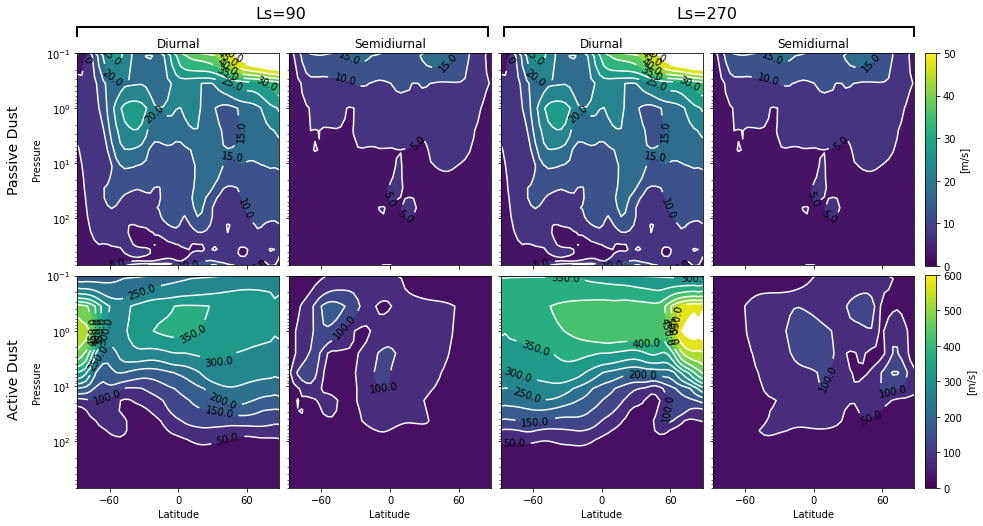

In [121]:
# look at vertical distribution of tidal amplitude
plev = mat_rpd_ucomp['plev']

surf_amp = np.mean(amp_rad_ucomp,axis=0)
tave_amp_ls90 = np.mean(surf_amp[:,:,18:23,:], axis=2)
tave_amp_ls270 = np.mean(surf_amp[:,:,53:57,:], axis=2)

surf_amp = np.mean(amp_rpd_ucomp,axis=0)
rpd_amp_ls90 = np.mean(surf_amp[:,:,18:23,:], axis=2)
rpd_amp_ls270 = np.mean(surf_amp[:,:,18:23,:], axis=2)

levels_rpd = np.arange(0,55,5)
levels_rad = np.arange(0,650,50)

fig, axs = py.subplots(2,4, figsize=(15,8),sharey=True, sharex = True)
varlist = [rpd_amp_ls90[:,:,0], rpd_amp_ls90[:,:,1],rpd_amp_ls270[:,:,0], rpd_amp_ls270[:,:,1],
           tave_amp_ls90[:,:,0],tave_amp_ls90[:,:,1],tave_amp_ls270[:,:,0],tave_amp_ls270[:,:,1]]
title = ['Diurnal','Semidiurnal','Diurnal','Semidiurnal']

axs = axs.ravel()
fig.subplots_adjust(wspace=0.05,hspace=0.05)
for i in range(0,8):

    axs[i].set_yscale('log')
    axs[i].set_ylim([700,1e-1])
    #axs[i].set_ylim([700,100])
    axs[i].xaxis.set_major_locator(MultipleLocator(60))
    
    
    if (i <= 3):
        axs[i].set_title(title[i])
        cs = axs[i].contourf(lat[:,0].squeeze(),plev[:,0].squeeze(),varlist[i].transpose(), levels=levels_rpd)
        cp = axs[i].contour(lat[:,0].squeeze(),plev[:,0].squeeze(),varlist[i].transpose(), levels=levels_rpd,colors='w')
        py.clabel(cp, fmt='%1.1f', colors='k')
    if (i==0 or i==4):
        axs[i].set_ylabel('Pressure')
    if (i>=4):
        axs[i].set_xlabel('Latitude')
        cs = axs[i].contourf(lat[:,0].squeeze(),plev[:,0].squeeze(),varlist[i].transpose(), levels=levels_rad)
        cp = axs[i].contour(lat[:,0].squeeze(),plev[:,0].squeeze(),varlist[i].transpose(), levels=levels_rad,colors='w')
        py.clabel(cp, fmt='%1.1f',colors='k')
    

# add colorbar
norm= matplotlib.colors.Normalize(vmin=np.min(levels_rpd), vmax=np.max(levels_rpd))
sm = py.cm.ScalarMappable(norm=norm, cmap = cs.cmap)
sm.set_array([])
cbar_ax = py.gcf().add_axes([0.91, 0.51, 0.01, 0.37])
clb = fig.colorbar(sm,  cax=cbar_ax,  orientation='vertical')
clb.set_label('[m/s]')

# add colorbar
norm= matplotlib.colors.Normalize(vmin=np.min(levels_rad), vmax=np.max(levels_rad))
sm = py.cm.ScalarMappable(norm=norm, cmap = cs.cmap)
sm.set_array([])
cbar_ax = py.gcf().add_axes([0.91, 0.125, 0.01, 0.37])
clb = fig.colorbar(sm,  cax=cbar_ax,  orientation='vertical')
clb.set_label('[m/s]')

# Bracket Ls90
x,y= np.array([0.125,0.505]), np.array([0.925,0.925])
line = Line2D(x, y, lw=2., color='k')
fig.add_artist(line)
x,y= np.array([0.125,0.125]), np.array([0.91,0.925])
line = Line2D(x, y, lw=2., color='k')
fig.add_artist(line)
x,y= np.array([0.505,0.505]), np.array([0.91,0.925])
line = Line2D(x, y, lw=2., color='k')
fig.add_artist(line)

# Bracket Ls270
x,y= np.array([0.52,0.9]), np.array([0.925,0.925])
line = Line2D(x, y, lw=2., color='k')
fig.add_artist(line)
x,y= np.array([0.52,0.52]), np.array([0.91,0.925])
line = Line2D(x, y, lw=2., color='k')
fig.add_artist(line)
x,y= np.array([0.9,0.9]), np.array([0.91,0.925])
line = Line2D(x, y, lw=2., color='k')
fig.add_artist(line)

py.gcf().text(0.29, 0.94, 'Ls=90', fontsize=16)
py.gcf().text(0.68, 0.94, 'Ls=270', fontsize=16)
py.gcf().text(0.06, 0.64, 'Passive Dust', fontsize=14, rotation=90)
py.gcf().text(0.06, 0.25, 'Active Dust', fontsize=14, rotation=90)

py.savefig('/Users/vhartwic/Documents/codes/VHPlots/Data/Papers/Hartwick+2022_ApJ/Figures/exomars_fig7.eps',dpi=300)



Figure 7: Amplitude of the diurnal and semi-diurnal component of the zonal wind for (row 1) passive dust simulations and (row 2) active dust simulations at both solstices. ** CHANGE TO TEMPERATURE**

#### Figure 8

In [122]:
# load base simulation datasets
# Earth Orbit, Inert Dust, Diurnal Average Heating
dataDIR = '/Users/vhartwic/Documents/codes/VHPlots/Data/Papers/Hartwick+2022_ApJ/fv3_2.1_rearth/fms_mars_pdust_diurnheat/01800.atmos_average_pstd.nc' #your file]
DPD = xr.open_dataset(dataDIR, decode_times=False)

# Earth Orbit, Active Dust, Diurnal Average Heating
dataDIR = '/Users/vhartwic/Documents/codes/VHPlots/Data/Papers/Hartwick+2022_ApJ/fv3_2.1_rearth/fms_mars_nocloud_diurnheat/01800.atmos_average_pstd.nc' #your file]
DRD = xr.open_dataset(dataDIR, decode_times=False)

# Earth Orbit,Active Dust, Diurnal Average Heating, Diurn File
dataDIR = '/Users/vhartwic/Documents/codes/VHPlots/Data/Papers/Hartwick+2022_ApJ/fv3_2.1_rearth/fms_mars_nocloud_diurnheat/01800.atmos_diurn.stress.nc' #your file]
DRD_diurn = xr.open_dataset(dataDIR, decode_times=False)

# Earth Orbit, Active Dust, Diurn File
dataDIR = '/Users/vhartwic/Documents/codes/VHPlots/Data/Papers/Hartwick+2022_ApJ/fv3_2.1_rearth/fms_mars_nocloud/01440.atmos_diurn.stress.nc' #your file]
DER_diurn = xr.open_dataset(dataDIR, decode_times=False)

# Earth Orbit, Inert Dust, Diunr File
dataDIR = '/Users/vhartwic/Documents/codes/VHPlots/Data/Papers/Hartwick+2022_ApJ/fv3_2.1_rearth/fms_mars_pdust/01440.atmos_diurn.stress.nc' #your file]
DEP_diurn = xr.open_dataset(dataDIR, decode_times=False)


In [123]:
# Find Zonal Average of all Vars
DPD_zave = DPD.mean('lon')
DRD_zave = DRD.mean('lon')
DRD_diurn_zave = DRD_diurn.mean('lon')

# change units of vapor mass to pr-um
dpd_zave_vap = np.mean(DPD.vap_mass_micro_col*(1e6/997.0),axis=2)
drd_zave_vap = np.mean(DRD.vap_mass_micro_col*(1e6/997.0),axis=2)

# Find global average dust optical depth (visible)
# First we need to convert the latitudes to radians
latr = np.deg2rad(DPD.lat)

# Use the cosine of the converted latitudes as weights for the average
weights = np.cos(latr)

# list of variables to prcoess
dpd_varlist = [DPD_zave.taudust_VIS, dpd_zave_vap, DPD_zave.ts, DPD_zave.ps,
             DPD_zave.dst_mass_col, DPD_zave.dst_mass_source, DPD_zave.dst_mass_ws_source]
drd_varlist = [DRD_zave.taudust_VIS, drd_zave_vap, DRD_zave.ts, DRD_zave.ps,
             DRD_zave.dst_mass_col, DRD_zave.dst_mass_source, DRD_zave.dst_mass_ws_source]

dpd_globalave, drd_globalave, ={},{}

# Then take the weighted average of those using the weights we calculated earlier
for x in range(0,len(dpd_varlist)):
        dpd_globalave[format(dpd_varlist[x].name)]=np.average(dpd_varlist[x],axis=1,weights=weights)     
        drd_globalave[format(drd_varlist[x].name)]=np.average(drd_varlist[x],axis=1,weights=weights)    


In [124]:
# Locate cardinal seasons in each year, then concotenate and average variables over all years in each season
# Next, process Earth orbit dataset - Passive Dust
yrs = [5]
ls90, ls180, ls270, ls0 = [], [], [], []
for i in yrs:
    loc90 = np.where(np.logical_and(DPD.areo >= 360*i + 80, DPD.areo <= 360*i + 100.))
    loc180 = np.where(np.logical_and(DPD.areo >= 360*i + 170, DPD.areo <= 360*i + 190.))
    loc270 = np.where(np.logical_and(DPD.areo >= 360*i + 260, DPD.areo <= 360*i + 280.))
    loc0 = np.where(np.logical_and(DPD.areo >= 360*i + 350, DPD.areo <= 360*(i+1) + 10.))
    
    ls90.append(loc90[0])
    ls180.append(loc180[0])
    ls270.append(loc270[0])
    ls0.append(loc0[0])
    
dpd_varlist = [DPD.stress, DPD.dst_mass_source, DPD.taudust_VIS, DPD.dst_mass_col, DPD.swflx, DPD.ts, DPD.ps,
              DPD_zave.temp, DPD_zave.ucomp, DPD_zave.vcomp, DPD_zave.dst_mass_micro, DPD_zave.ice_mass_micro,
              DPD_zave.vap_mass_micro, DPD_zave.dst_num_micro, DPD_zave.swh, DPD.dst_mass_ws_source,DPD.snow]

# take average over time (all years)
a,b,c,d = np.concatenate(ls90),np.concatenate(ls180),np.concatenate(ls270),np.concatenate(ls0)
dpd_ls90, dpd_ls180, dpd_ls270, dpd_ls0={},{},{},{}

for x in range(0,len(dpd_varlist)):
        dpd_ls90[format(dpd_varlist[x].name)]=np.mean(dpd_varlist[x][a,:,:],axis=0)
        dpd_ls180[format(dpd_varlist[x].name)]=np.mean(dpd_varlist[x][b,:,:],axis=0)
        dpd_ls270[format(dpd_varlist[x].name)]=np.mean(dpd_varlist[x][c,:,:],axis=0)
        dpd_ls0[format(dpd_varlist[x].name)]=np.mean(dpd_varlist[x][d,:,:],axis=0) 

# diurn files
yrs = [4]
ls90, ls180, ls270, ls0 = [], [], [], []
for i in yrs:
    loc90 = np.where(np.logical_and(DER_diurn.areo >= 360*i + 80, DER_diurn.areo <= 360*i + 100.))
    loc180 = np.where(np.logical_and(DER_diurn.areo >= 360*i + 170, DER_diurn.areo <= 360*i + 190.))
    loc270 = np.where(np.logical_and(DER_diurn.areo >= 360*i + 260, DER_diurn.areo <= 360*i + 280.))
    loc0 = np.where(np.logical_and(DER_diurn.areo >= 360*i + 350, DER_diurn.areo <= 360*(i+1) + 10.))
    
    ls90.append(loc90[0])
    ls180.append(loc180[0])
    ls270.append(loc270[0])
    ls0.append(loc0[0])

# take average over time (all years)
a,b,c,d = np.concatenate(ls90),np.concatenate(ls180),np.concatenate(ls270),np.concatenate(ls0)
der_diurn_ls90, der_diurn_ls180, der_diurn_ls270, der_diurn_ls0={},{},{},{}
dep_diurn_ls90, dep_diurn_ls180, dep_diurn_ls270, dep_diurn_ls0={},{},{},{}

der_diurn_ls90[format(DER_diurn.stress.name)]=np.mean(DER_diurn.stress[a,:,:,:], axis=0)
der_diurn_ls270[format(DER_diurn.stress.name)]=np.mean(DER_diurn.stress[c,:,:,:], axis=0)
dep_diurn_ls90[format(DEP_diurn.stress.name)]=np.mean(DEP_diurn.stress[a,:,:,:], axis=0)
dep_diurn_ls270[format(DEP_diurn.stress.name)]=np.mean(DEP_diurn.stress[c,:,:,:], axis=0)

yrs = [5]
ls90, ls180, ls270, ls0 = [], [], [], []
for i in yrs:
    loc90 = np.where(np.logical_and(DRD.areo >= 360*i + 80, DRD.areo <= 360*i + 100.))
    loc180 = np.where(np.logical_and(DRD.areo >= 360*i + 170, DRD.areo <= 360*i + 190.))
    loc270 = np.where(np.logical_and(DRD.areo >= 360*i + 260, DRD.areo <= 360*i + 280.))
    loc0 = np.where(np.logical_and(DRD.areo >= 360*i + 350, DRD.areo <= 360*(i+1) + 10.))
    
    ls90.append(loc90[0])
    ls180.append(loc180[0])
    ls270.append(loc270[0])
    ls0.append(loc0[0])

drd_varlist = [DRD.stress, DRD.dst_mass_source, DRD.taudust_VIS, DRD.dst_mass_col, DRD.swflx, DRD.ts, DRD.ps,
              DRD_zave.temp, DRD_zave.ucomp, DRD_zave.vcomp, DRD_zave.dst_mass_micro, DRD_zave.ice_mass_micro,
              DRD_zave.vap_mass_micro, DRD_zave.dst_num_micro, DRD_zave.swh, DRD_zave.lwh, DRD.dst_mass_ws_source, DRD.snow]


# take average over time (all years)
a,b,c,d = np.concatenate(ls90),np.concatenate(ls180),np.concatenate(ls270),np.concatenate(ls0)
drd_ls90, drd_ls180, drd_ls270, drd_ls0={},{},{},{}
drd_diurn_ls90, drd_diurn_ls270 = {},{}

for x in range(0,len(drd_varlist)):
        drd_ls90[format(drd_varlist[x].name)]=np.mean(drd_varlist[x][a,:,:],axis=0)
        drd_ls180[format(drd_varlist[x].name)]=np.mean(drd_varlist[x][b,:,:],axis=0)
        drd_ls270[format(drd_varlist[x].name)]=np.mean(drd_varlist[x][c,:,:],axis=0)
        drd_ls0[format(drd_varlist[x].name)]=np.mean(drd_varlist[x][d,:,:],axis=0)

drd_diurn_ls90[format(DRD_diurn.stress.name)]=np.mean(DRD_diurn.stress[a,:,:,:], axis=0)
drd_diurn_ls270[format(DRD_diurn.stress.name)]=np.mean(DRD_diurn.stress[c,:,:,:], axis=0)


In [125]:
# also calculate mass stream function
#constants
pavesfc = 725.0
radius = 3.39E+6
grav = 3.72
pscale = 1

# quick cheaters method to add the plevs dimension to cosy calculation
cosyi = []
for i in range(0,len(DPD.pstd)):
    cosyi += [np.cos(DPD.lat*np.pi/180.)]
cosy = np.stack(cosyi, axis=0)

## NEW METHOD ALERT: o sum with one up or one down in array
# use np.roll to shift array by some amount (e.g -1, shifts 1 left)
# then add or substract from original array 

# scale vertical pressure levels
zoverh = -np.log(np.divide(DPD.pstd,pavesfc))

# difference between pressure level and one above (will be negative)
diffp = np.roll(zoverh,-1)-zoverh

# loop through seasons
dpd_varlist = [dpd_ls90['vcomp'],dpd_ls180['vcomp'],dpd_ls270['vcomp'],dpd_ls0['vcomp']]
drd_varlist = [drd_ls90['vcomp'],drd_ls180['vcomp'],drd_ls270['vcomp'],drd_ls0['vcomp']]


dpd_dictlist = [dpd_ls90, dpd_ls180, dpd_ls270, dpd_ls0]
drd_dictlist = [drd_ls90, drd_ls180, drd_ls270, drd_ls0]

for i in range(0,4):   # loop through seasonso
    
    # scale the zonal average v field by the pressure at each level
    drd_fl = drd_varlist[i]*exp(-zoverh)
    dpd_fl = dpd_varlist[i]*exp(-zoverh)

    # sum fl with 1 level above
    drd_sumfl = drd_fl + np.roll(drd_fl,-1, axis=0)
    dpd_sumfl = dpd_fl + np.roll(dpd_fl,-1, axis=0)

    # scale by pavesfc and find average
    dpd_sumv = 0.5*dpd_sumfl*diffp*pavesfc*pscale*1.e-8
    drd_sumv = 0.5*drd_sumfl*diffp*pavesfc*pscale*1.e-8

    # sum over all levels above
    dpd_vcum = np.nancumsum(dpd_sumv,axis=0)
    drd_vcum = np.nancumsum(drd_sumv,axis=0)

    # calculate mass stream function
    dpd_msf = 2.0*np.pi*radius * cosy / grav * dpd_vcum
    drd_msf = 2.0*np.pi*radius * cosy / grav * drd_vcum
    
    # add to dictionary

    dpd_dictlist[i]['msf']=dpd_msf
    drd_dictlist[i]['msf']=drd_msf
    

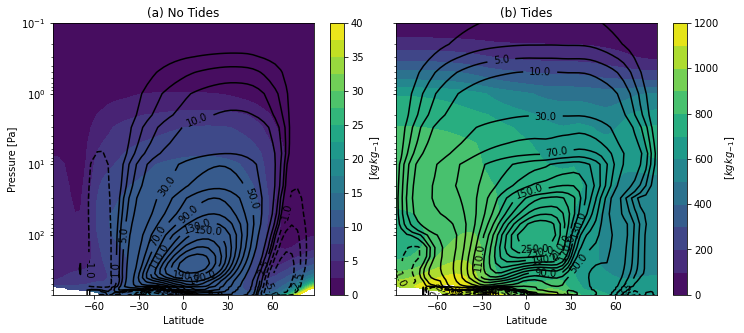

In [126]:

# Dust MR and Temp
level_d1 = [0,2.5,5,7.5,10.,12.5,15.,17.5,20.,22.5,25.,27.5,30.,32.5,35.,37.5,40]
level_d2 = [0,100, 200,300,400,500,600,700,800, 900,1000,1100,1200]

msf_levels = [-250., -230., -210., -190., -170., -150., -130., -110.,  -90.,
        -70.,  -50.,  -30.,  -10., -5., -2.5, -1., 1., 2.5, 5.,  10.,   30.,   50.,   70.,   90.,
        110.,  130.,  150.,  170.,  190.,  210.,  230.,  250.]
levunity = [0, 1, 1000]

varlist = [drd_ls270['dst_mass_micro'],der_ls270['dst_mass_micro']]
varlist2 = [drd_ls270['msf'],der_ls270['msf']]

title=['(a) No Tides', '(b) Tides']

fig, axs = py.subplots(1,2, sharey=True, figsize=(12,5))
axs = axs.ravel()
fig.subplots_adjust(wspace=0.05)

for i in range(0,2):

    axs[i].set_yscale('log')
    axs[i].set_ylim([700,1e-1])
    axs[i].xaxis.set_major_locator(MultipleLocator(30))

    if i==0:
        fig = axs[i].contourf(DMP.lat, DMP.pstd,varlist[i]*1e6,cmap=py.cm.viridis, levels=level_d1)
        py.colorbar(fig,ax=axs[i],orientation='vertical',label='$\ [kgkg_{-1}$]') 
    if i==1:
        fig = axs[i].contourf(DMP.lat, DMP.pstd,varlist[i]*1e6,cmap=py.cm.viridis, levels=level_d2)
        py.colorbar(fig,ax=axs[i],orientation='vertical',label='$\ [kgkg_{-1}$]')

    fig = axs[i].contour(DMP.lat, DMP.pstd,varlist2[i]*-1, np.linspace(-250,250,26), levels=msf_levels,colors='k')
    py.clabel(fig,fmt='%1.1f')
    
    
    
    if i <= 1:
        axs[i].set_title(title[i])
    if i == 0 or i==2:
        axs[i].set_ylabel('Pressure [Pa]')
    
    axs[i].set_xlabel('Latitude')
    
py.savefig('/Users/vhartwic/Documents/codes/VHPlots/Data/Papers/Hartwick+2022_ApJ/Figures/exomars_fig8.eps',dpi=300)

#### Figure 9

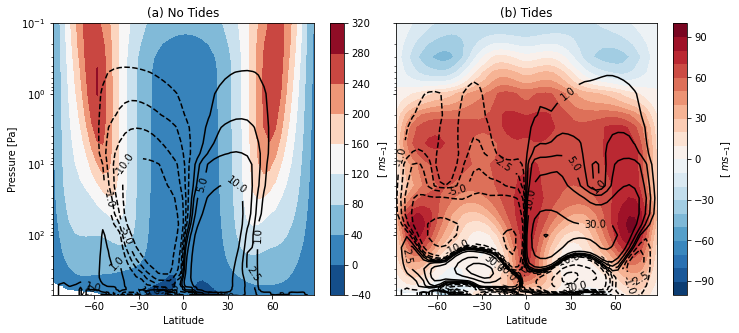

In [127]:

# Dust MR and Temp
level_d1 = [0,2.5,5,7.5,10.,12.5,15.,17.5,20.,22.5,25.,27.5,30.,32.5,35.,37.5,40]
level_d2 = [0,100, 200,300,400,500,600,700,800, 900,1000,1100,1200]
levels=np.arange(-100,110,10)
levelsa=np.arange(-300,350,50)


msf_levels = [-250., -230., -210., -190., -170., -150., -130., -110.,  -90.,
        -70.,  -50.,  -30.,  -10., -5., -2.5, -1., 1., 2.5, 5.,  10.,   30.,   50.,   70.,   90.,
        110.,  130.,  150.,  170.,  190.,  210.,  230.,  250.]
levunity = [0, 1, 1000]

varlist = [drd_ls180['ucomp'],der_ls180['ucomp']]
varlist2 = [drd_ls180['msf'],der_ls180['msf']]

title=['(a) No Tides', '(b) Tides']

fig, axs = py.subplots(1,2, sharey=True, figsize=(12,5))
axs = axs.ravel()
fig.subplots_adjust(wspace=0.05)

for i in range(0,2):

    axs[i].set_yscale('log')
    axs[i].set_ylim([700,1e-1])
    axs[i].xaxis.set_major_locator(MultipleLocator(30))

    if i==0:
        fig = axs[i].contourf(DMP.lat, DMP.pstd,varlist[i],cmap=py.cm.RdBu_r)
        py.colorbar(fig,ax=axs[i],orientation='vertical',label='[$\ ms_{-1}$]') 
    if i==1:
        fig = axs[i].contourf(DMP.lat, DMP.pstd,varlist[i],cmap=py.cm.RdBu_r, levels=levels)
        py.colorbar(fig,ax=axs[i],orientation='vertical',label='[$\ ms_{-1}$]')

    fig = axs[i].contour(DMP.lat, DMP.pstd,varlist2[i]*-1, np.linspace(-250,250,26), levels=msf_levels,colors='k')
    py.clabel(fig,fmt='%1.1f')
    #axs[i].grid(b=None, which='major', axis='both') 
    
    
    
    if i <= 1:
        axs[i].set_title(title[i])
    if i == 0 or i==2:
        axs[i].set_ylabel('Pressure [Pa]')
    
    axs[i].set_xlabel('Latitude')
    
py.savefig('/Users/vhartwic/Documents/codes/VHPlots/Data/Papers/Hartwick+2022_ApJ/Figures/exomars_fig9.eps',dpi=300)

Figure 9 : Equinoctial (Ls=180°) mean meridional circulation [kgm-2s-1] x 108 and zonal wind [ms-1] fields for simulations at Earth orbit with (a) diurnal average heating compared to (b) our base simulation with radiatively active dust. MMC is shown in black contours, the seasonal mean zonal winds are shown by filled contours

### 3.5 Dust Radiative Effects on the Surface Wind Speed and Wind Driven Dust Lifting

#### Figure 10

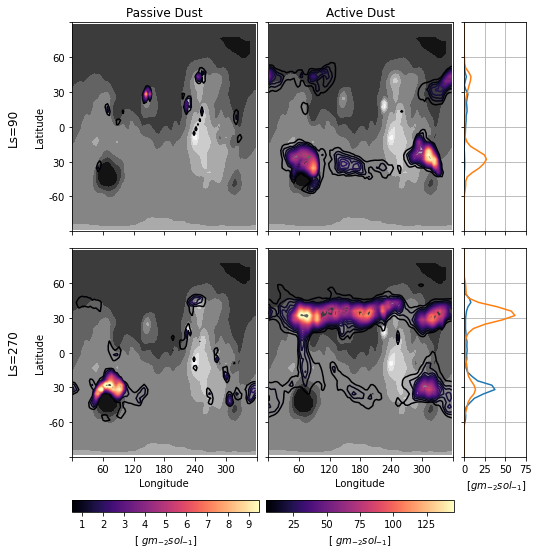

In [128]:
# Solsticial Dust Activity
import matplotlib.colors as mcolors

varlist = [ dep_ls90['dst_mass_ws_source'],der_ls90['dst_mass_ws_source'],
          dep_ls270['dst_mass_ws_source'],der_ls270['dst_mass_ws_source']]

varlist2 = [ dep_ls90['dst_mass_ws_source'],dep_ls270['dst_mass_ws_source'],
            der_ls90['dst_mass_ws_source'],der_ls270['dst_mass_ws_source']]

level_lift_passive = np.arange(0.5,10,0.5)
level_lift = np.arange(5,150,5)

title=['Passive Dust','Active Dust']

fig, axs = py.subplots(2,3, sharey=True, figsize=(10,8),gridspec_kw={'width_ratios': [3, 3, 1]}, constrained_layout=True)
fig.subplots_adjust(left=0.17,wspace=0.08, hspace=0.08,right=0.8)

# axs[row,column]
axs[0,0].set_title(str(title[0]))
axs[0,1].set_title(str(title[1]))
axs[0,0].set_ylabel('Latitude')
axs[1,0].set_ylabel('Latitude')
axs[1,0].set_xlabel('Longitude')
axs[1,1].set_xlabel('Longitude')
axs[1,2].set_xlabel('$\ [gm_{-2}sol_{-1}]$')
axs[0,0].set_xlim([0,360])
axs[0,1].set_xlim([0,360])
axs[0,2].set_xlim([0,75])
axs[1,0].set_xlim([0,360])
axs[1,1].set_xlim([0,360])
axs[1,2].set_xlim([0,75])
axs[0,0].set_ylim([-90,90])
axs[0,0].yaxis.set_major_locator(MultipleLocator(30))

axs[0,0].set_yticklabels(['','',-60,30,0,30,60,'' ])
axs[1,0].set_yticklabels(['','',-60,30,0,30,60,'' ])
axs[1,0].set_xticklabels(['','',60,120,180,240,300,'' ])
axs[1,1].set_xticklabels(['','',60,120,180,240,300,'' ])

# panel a
axs[0,0].xaxis.set_major_locator(MultipleLocator(60))
axs[0,0].set_xticklabels([])
cs = axs[0,0].contourf(DMP.lon, DMP.lat,topo, cmap=py.cm.Greys_r)
cs = axs[0,0].contour(DMP.lon,DMP.lat, varlist[0]*C,cmap=py.cm.magma, levels=level_lift_passive)

# panel b
axs[0,1].xaxis.set_major_locator(MultipleLocator(60))
axs[0,1].set_xticklabels([])
cs = axs[0,1].contourf(DMP.lon, DMP.lat,topo, cmap=py.cm.Greys_r)
cs = axs[0,1].contour(DMP.lon,DMP.lat, varlist[1]*C,cmap=py.cm.magma, levels=level_lift)

# panel c
axs[0,2].xaxis.set_major_locator(MultipleLocator(25))
axs[0,2].set_xticklabels([])
axs[0,2].grid(b=None, which='major', axis='both') 
axs[0,2].plot(varlist[0].mean('lon')*C*25,DMP.lat, color='tab:blue')
axs[0,2].plot(varlist[1].mean('lon')*C,DMP.lat,color='tab:orange')

# panel d
axs[1,0].xaxis.set_major_locator(MultipleLocator(60))
cs = axs[1,0].contourf(DMP.lon, DMP.lat,topo, cmap=py.cm.Greys_r)
cs = axs[1,0].contour(DMP.lon,DMP.lat, varlist[2]*C,cmap=py.cm.magma, levels=level_lift_passive)

norm= matplotlib.colors.Normalize(vmin=level_lift_passive.min(), vmax=level_lift_passive.max())
sm = py.cm.ScalarMappable(norm=norm, cmap = cs.cmap)
sm.set_array([])
cbar_ax = py.gcf().add_axes([0.17, 0.03, 0.26, 0.02])
clb = fig.colorbar(sm,  cax=cbar_ax, ticks=[0,1,2,3,4,5,6,7,8,9],  orientation='horizontal')
clb.set_label('[$\ gm_{-2}sol_{-1}]$')

# panel e
axs[1,1].xaxis.set_major_locator(MultipleLocator(60))
cs = axs[1,1].contourf(DMP.lon, DMP.lat,topo, cmap=py.cm.Greys_r)
cs = axs[1,1].contour(DMP.lon,DMP.lat, varlist[3]*C,cmap=py.cm.magma, levels=level_lift)

# panel f
axs[1,2].xaxis.set_major_locator(MultipleLocator(25))
axs[1,2].grid(b=None, which='major', axis='both') 
axs[1,2].plot(varlist[2].mean('lon')*C*25,DMP.lat, color='tab:blue')
axs[1,2].plot(varlist[3].mean('lon')*C,DMP.lat,color='tab:orange')


norm= matplotlib.colors.Normalize(vmin=level_lift.min(), vmax=level_lift.max())
sm = py.cm.ScalarMappable(norm=norm, cmap = cs.cmap)
sm.set_array([])
cbar_ax = py.gcf().add_axes([0.44, 0.03, 0.26, 0.02])
clb = fig.colorbar(sm,  cax=cbar_ax, ticks=[0,25,50,75,100,125,150],  orientation='horizontal')
clb.set_label('[$\ gm_{-2}sol_{-1}]$')



    
py.gcf().text(0.08, 0.67, 'Ls=90', fontsize=12, rotation=90)
py.gcf().text(0.08, 0.275, 'Ls=270', fontsize=12, rotation=90)

    
py.savefig('/Users/vhartwic/Documents/codes/VHPlots/Data/Papers/Hartwick+2022_ApJ/Figures/exomars_fig10.eps',dpi=300)


Figure 10: Solsticial wind driven dust lifting rates [gm-2sol-1] (contour lines) for active and passive dust simulations. Filled contours show topography. Line plots show the zonal average dust lifting rates for active dust (orange line) and passive dust (blue line) simulations.  Passive dust values are multiplied by 25 for visibility.

#### Figure 11

In [129]:
# Earth Orbit, Active Dust, Diurn File
dataDIR = '/Users/vhartwic/Documents/codes/VHPlots/Data/Papers/Hartwick+2022_ApJ/fv3_2.1_rearth/fms_mars_nocloud/diurn_yr5/*.atmos_diurn.nc'
DER_diurn = xr.open_mfdataset(dataDIR, decode_times=False,combine='by_coords')

# Earth Orbit, Inert Dust, Diurn File
dataDIR = '/Users/vhartwic/Documents/codes/VHPlots/Data/Papers/Hartwick+2022_ApJ/fv3_2.1_rearth/fms_mars_pdust/01800.atmos_diurn.min.nc'
DEP_diurn = xr.open_dataset(dataDIR, decode_times=False)

# Save RAD rho
dataDIR = '/Users/vhartwic/Documents/codes/VHPlots/Data/Papers/Hartwick+2022_ApJ/fv3_2.1_rearth/fms_mars_nocloud/01800.atmos_diurn_rho.nc'
tmp = xr.open_dataset(dataDIR, decode_times=False)
rho = tmp.rho

In [130]:
# Final Version : use rho, and seasonal averages
# Locate Seasons
yrs = [5]
areo = DER_diurn.areo[:,0,0].squeeze()
ls90, ls180, ls270, ls0 = [], [], [], []
for i in yrs:
    loc90 = np.where(np.logical_and(areo >= 360*i + 80, areo <= 360*i + 100.))
    loc270 = np.where(np.logical_and(areo >= 360*i + 260, areo <= 360*i + 280.))
    
    ls90.append(loc90[0])
    ls270.append(loc270[0])
    
a,c = np.concatenate(ls90),np.concatenate(ls270)

#----------------------------------------------------------------------------
# Passive Dust Simulation
#----------------------------------------------------------------------------

# find zonal, time average stress
dep_stress_ls90 = DEP_diurn.stress[a,:,:,:].mean('time_of_day_24').mean('time').mean('lon')
dep_stress_ls270 = DEP_diurn.stress[c,:,:,:].mean('time_of_day_24').mean('time').mean('lon')

# calculate approximate stress
# OPTION 1 : Calculate stress first, then take time, time of day and zonal average
cd = 0.0018

# OPTION 3 : calculate stress using daily, zonal mean of u and v
dep_tzs_ls270 = cd * DEP_diurn.rho[c,:,27,:,:].mean('time_of_day_24').mean('time').mean('lon')*(DEP_diurn.ucomp[c,:,27,:,:].mean('time_of_day_24').mean('time').mean('lon')**2 + DEP_diurn.vcomp[c,:,27,:,:].mean('time_of_day_24').mean('time').mean('lon')**2)
dep_tzw_ls270 = sqrt(DEP_diurn.ucomp[c,:,27,:,:].mean('time_of_day_24').mean('time').mean('lon')**2 + DEP_diurn.vcomp[c,:,27,:,:].mean('time_of_day_24').mean('time').mean('lon')**2)
dep_tzs_ls90 = cd * DEP_diurn.rho[a,:,27,:,:].mean('time_of_day_24').mean('time').mean('lon')*(DEP_diurn.ucomp[a,:,27,:,:].mean('time_of_day_24').mean('time').mean('lon')**2 + DEP_diurn.vcomp[a,:,27,:,:].mean('time_of_day_24').mean('time').mean('lon')**2)
dep_tzw_ls90 = sqrt(DEP_diurn.ucomp[a,:,27,:,:].mean('time_of_day_24').mean('time').mean('lon')**2 + DEP_diurn.vcomp[a,:,27,:,:].mean('time_of_day_24').mean('time').mean('lon')**2)

#----------------------------------------------------------------------------
# Active Dust Simulations
#----------------------------------------------------------------------------

# find zonal, time average stress
der_stress_ls90 = DER_diurn.stress[a,:,:,:].mean('time_of_day_24').mean('time').mean('lon')
der_stress_ls270 = DER_diurn.stress[c,:,:,:].mean('time_of_day_24').mean('time').mean('lon')

# calculate approximate stress
# OPTION 3 : calculate stress using daily, zonal mean of u and v
der_tzs_ls270 = cd * rho[c,:,27,:,:].mean('time_of_day_24').mean('time').mean('lon')*(DER_diurn.ucomp[c,:,27,:,:].mean('time_of_day_24').mean('time').mean('lon')**2 + DER_diurn.vcomp[c,:,27,:,:].mean('time_of_day_24').mean('time').mean('lon')**2)
der_tzw_ls270 = sqrt(DER_diurn.ucomp[c,:,27,:,:].mean('time_of_day_24').mean('time').mean('lon')**2 + DER_diurn.vcomp[c,:,27,:,:].mean('time_of_day_24').mean('time').mean('lon')**2)
der_tzs_ls90 = cd * rho[a,:,27,:,:].mean('time_of_day_24').mean('time').mean('lon')*(DER_diurn.ucomp[a,:,27,:,:].mean('time_of_day_24').mean('time').mean('lon')**2 + DER_diurn.vcomp[a,:,27,:,:].mean('time_of_day_24').mean('time').mean('lon')**2)
der_tzw_ls90 = sqrt(DER_diurn.ucomp[a,:,27,:,:].mean('time_of_day_24').mean('time').mean('lon')**2 + DER_diurn.vcomp[a,:,27,:,:].mean('time_of_day_24').mean('time').mean('lon')**2)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


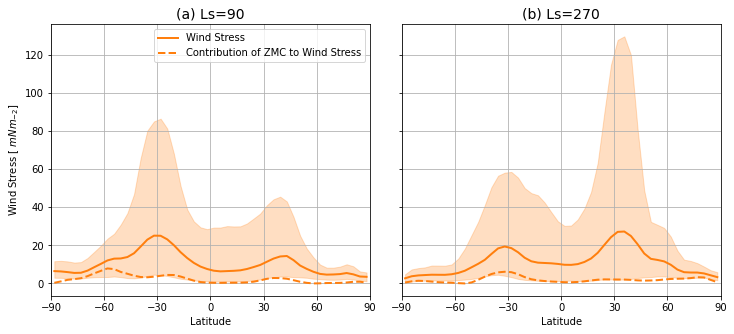

In [131]:
title=['Ls=90','Ls=270']

fig, axs = py.subplots(1,2, figsize=(12,5), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.1)
axs = axs.ravel()

axs[0].set_xlim([-90,90])
# panel a - Ls 90
axs[0].set_title('(a) Ls=90', fontsize=14)
axs[0].set_xlabel('Latitude')
axs[0].xaxis.set_major_locator(MultipleLocator(30))
axs[0].set_ylabel('Wind Stress [$\ mNm_{-2}$]')
fig = axs[0].plot(DER_diurn.lat, der_stress_ls90*1000, linewidth=2,color='tab:orange', label='Wind Stress')
axs[0].plot(DER_diurn.lat, der_tzs_ls90*1000, linewidth=2,color='tab:orange',linestyle='--', label='Contribution of ZMC to Wind Stress')
minmax = DER_diurn.stress[a,:,:,:].mean('time')
axs[0].fill_between(DER_diurn.lat, min(minmax,axis=0).mean('lon')*1000, max(minmax,axis=0).mean('lon')*1000, alpha=0.25,color='tab:orange')
#axs[0].plot(DER_diurn.lat, dep_stress_ls90*1000, linewidth=2,label='Stress',color='tab:blue')
#axs[0].plot(DER_diurn.lat, dep_tzs_ls90*1000, linewidth=2,label='Passive',color='tab:blue',linestyle='--')
#minmax =  DEP_diurn.stress[a,:,:,:].mean('time')
#axs[0].fill_between(DER_diurn.lat, min(minmax,axis=0).mean('lon')*1000, max(minmax,axis=0).mean('lon')*1000, alpha=0.25,color='tab:blue')
axs[0].legend()
axs[0].grid(b=None, which='major', axis='both') 



# panel b- Stress Ls 270
axs[1].set_title('(b) Ls=270',fontsize=14)
axs[1].set_xlabel('Latitude')
fig = axs[1].plot(DER_diurn.lat, der_stress_ls270*1000, linewidth=2,label='Active',color='tab:orange')
axs[1].plot(DEP_diurn.lat, der_tzs_ls270*1000, linewidth=2,label='Active',color='tab:orange',linestyle='--')
minmax =  DER_diurn.stress[c,:,:,:].mean('time')
axs[1].fill_between(DER_diurn.lat, min(minmax,axis=0).mean('lon')*1000, max(minmax,axis=0).mean('lon')*1000, alpha=0.25,color='tab:orange')
#axs[1].plot(DER_diurn.lat, dep_stress_ls270*1000, linewidth=2,label='Stress',color='tab:blue')
#axs[1].plot(DER_diurn.lat, dep_tzs_ls270*1000, linewidth=2,label='Passive',color='tab:blue',linestyle='--')
#minmax =  DEP_diurn.stress[c,:,:,:].mean('time')
#axs[1].fill_between(DER_diurn.lat, min(minmax,axis=0).mean('lon')*1000, max(minmax,axis=0).mean('lon')*1000, alpha=0.25,color='tab:blue')
axs[1].grid(b=None, which='major', axis='both') 

    
py.savefig('/Users/vhartwic/Documents/codes/VHPlots/Data/Papers/Hartwick+2022_ApJ/Figures/exomars_fig11.eps',dpi=300)


Figure 11: Solsticial zonal mean surface wind stress [mNm-2] and estimated contribution of the zonal mean circulation to the surface wind stress. The envelope shows the zonal mean diurnal minimum and maximum values. Left column is for Ls=90, right column is for Ls=270.

#### Figure 12

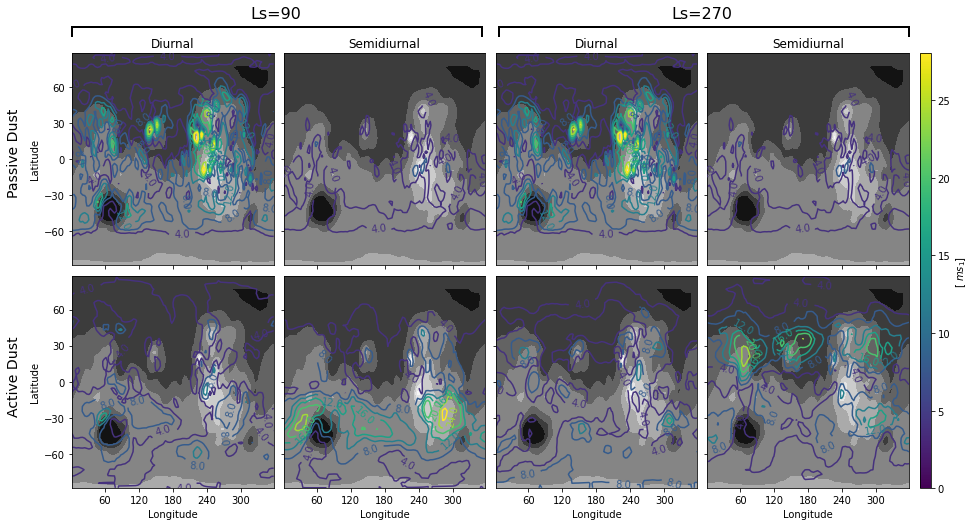

In [133]:
#### look at horizontal distribution of tidal amplitude
from matplotlib.lines import Line2D
plev = mat_rpd_ucomp['plev']

surf_amp = amp_rad_ucomp[:,:,27,:,:]
tave_amp_ls90 = np.mean(surf_amp[:,:,18:23,:], axis=2)
tave_amp_ls270 = np.mean(surf_amp[:,:,53:57,:], axis=2)

surf_amp = amp_rpd_ucomp[:,:,27,:,:]
rpd_amp_ls90 = np.mean(surf_amp[:,:,18:23,:], axis=2)
rpd_amp_ls270 = np.mean(surf_amp[:,:,18:23,:], axis=2)

level_amp = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
level_amp = [0,2.5,5,7.5,10,12.5,15,17.5,20]
level_amp = np.arange(0,32,4)

fig, axs = py.subplots(2,4, figsize=(15,8),sharey=True, sharex = True)
varlist = [rpd_amp_ls90[:,:,0], rpd_amp_ls90[:,:,1],rpd_amp_ls270[:,:,0], rpd_amp_ls270[:,:,1],
           tave_amp_ls90[:,:,0],tave_amp_ls90[:,:,1],tave_amp_ls270[:,:,0],tave_amp_ls270[:,:,1]]
title = ['Diurnal','Semidiurnal','Diurnal','Semidiurnal']


fig.subplots_adjust(wspace=0.05,hspace=0.05)
for i in range(0,8):

    axs[0,0].xaxis.set_major_locator(MultipleLocator(60))
    axs[0,0].yaxis.set_major_locator(MultipleLocator(30))
    
    if (i <= 3):
        axs[0,i].set_title(title[i])
        cs = axs[0,i].contour(lon[:,0].squeeze(),lat[:,0].squeeze(),varlist[i].transpose(),levels=level_amp)
        py.clabel(cs, fmt='%1.1f')
        axs[0,i].contourf(lon[:,0].squeeze(),lat[:,0].squeeze(),topo, cmap=py.cm.Greys_r)

    if (i==0): 
        axs[0,i].set_ylabel('Latitude')
    if (i==4):
        axs[1,-4].set_ylabel('Latitude')
    if (i>=4):
        axs[1,i-4].set_xlabel('Longitude')
        cs = axs[1,i-4].contour(lon[:,0].squeeze(),lat[:,0].squeeze(),varlist[i].transpose(),levels=level_amp)
        py.clabel(cs, fmt='%1.1f')
        axs[1,i-4].contourf(lon[:,0].squeeze(),lat[:,0].squeeze(),topo, cmap=py.cm.Greys_r)

# add colorbar
norm= matplotlib.colors.Normalize(vmin=np.min(level_amp), vmax=np.max(level_amp))
sm = py.cm.ScalarMappable(norm=norm, cmap = cs.cmap)
sm.set_array([])
cbar_ax = py.gcf().add_axes([0.91, 0.124, 0.01, 0.755])
clb = fig.colorbar(sm,  cax=cbar_ax,  orientation='vertical')
clb.set_label('[$\ ms_{1}$]')
    
py.gcf().text(0.065, 0.635, 'Passive Dust', fontsize=14, rotation=90)
py.gcf().text(0.065, 0.255, 'Active Dust', fontsize=14, rotation=90)
py.gcf().text(0.29, 0.94, 'Ls=90', fontsize=16)
py.gcf().text(0.68, 0.94, 'Ls=270', fontsize=16)

# Bracket Ls90
x,y= np.array([0.125,0.505]), np.array([0.925,0.925])
line = Line2D(x, y, lw=2., color='k')
fig.add_artist(line)
x,y= np.array([0.125,0.125]), np.array([0.91,0.925])
line = Line2D(x, y, lw=2., color='k')
fig.add_artist(line)
x,y= np.array([0.505,0.505]), np.array([0.91,0.925])
line = Line2D(x, y, lw=2., color='k')
fig.add_artist(line)

# Bracket Ls270
x,y= np.array([0.52,0.9]), np.array([0.925,0.925])
line = Line2D(x, y, lw=2., color='k')
fig.add_artist(line)
x,y= np.array([0.52,0.52]), np.array([0.91,0.925])
line = Line2D(x, y, lw=2., color='k')
fig.add_artist(line)
x,y= np.array([0.9,0.9]), np.array([0.91,0.925])
line = Line2D(x, y, lw=2., color='k')
fig.add_artist(line)

    
py.savefig('/Users/vhartwic/Documents/codes/VHPlots/Data/Papers/Hartwick+2022_ApJ/Figures/exomars_fig12.eps',dpi=300)

Figure 12: Surface amplitudes of the diurnal and semidiurnal components of the zonal wind for (row 1) passive dust simulations and (row 2) active dust simulations at both solstices.

### 3.6/3.7 Land Planet Climate as a Function of Orbit

#### Figure 13

In [135]:
# Far Orbit (S=450), Active Dust
dataDIR = '/Users/vhartwic/Documents/codes/VHPlots/Data/Papers/Hartwick+2022_ApJ/IntOrbits/fms_mars_nocloud_S450/00830.atmos_average_pstd.nc'
DRS450 = xr.open_dataset(dataDIR, decode_times=False)

# Mars Orbit, Active Dust
dataDIR = '/Users/vhartwic/Documents/codes/VHPlots/Data/Papers/Hartwick+2022_ApJ/fv3_2.0_rmars/fms_mars_nocloud/*.atmos_average_plevs.nc'
DMR = xr.open_mfdataset(dataDIR, decode_times=False, combine='by_coords')
# change coordinate name
DMR = DMR.rename({'plevs': 'pstd'})

# Intermediate 3 (S=1200), Active Dust
dataDIR = '/Users/vhartwic/Documents/codes/VHPlots/Data/Papers/Hartwick+2022_ApJ/IntOrbits/fms_mars_nocloud_S1200/*.atmos_average_pstd.nc' #your file]
DRS1200 = xr.open_mfdataset(dataDIR, decode_times=False, combine='by_coords')

# Intermediate 2 (S=1000), Active Dust
dataDIR = '/Users/vhartwic/Documents/codes/VHPlots/Data/Papers/Hartwick+2022_ApJ/IntOrbits/fms_mars_nocloud_S1000/00720.atmos_average_pstd.nc' #your file]
DRS1000 = xr.open_mfdataset(dataDIR, decode_times=False, combine='by_coords')

# Intermediate 1 (S=800), Active Dust
dataDIR = '/Users/vhartwic/Documents/codes/VHPlots/Data/Papers/Hartwick+2022_ApJ/IntOrbits/fms_mars_nocloud_S800/*.atmos_average_pstd.nc' #your file]
DRS800 = xr.open_mfdataset(dataDIR, decode_times=False, combine='by_coords')

In [136]:
# Find Zonal Average of all Vars
DMR_zave = DMR.mean('lon')
DRS450_zave = DRS450.mean('lon')
DRS1200_zave = DRS1200.mean('lon')
DRS1000_zave = DRS1000.mean('lon')
DRS800_zave = DRS800.mean('lon')

# change units of vapor mass to pr-um
drs1200_zave_vap = np.mean(DRS1200.vap_mass_micro_col*(1e6/997.0),axis=2)
drs1000_zave_vap = np.mean(DRS1000.vap_mass_micro_col*(1e6/997.0),axis=2)
drs800_zave_vap = np.mean(DRS800.vap_mass_micro_col*(1e6/997.0),axis=2)
drs450_zave_vap = np.mean(DRS450.vap_mass_micro_col*(1e6/997.0),axis=2)
dmr_zave_vap = np.mean(DMR.vap_mass_micro_col*(1e6/997.0),axis=2)

# Find global average dust optical depth (visible)
# First we need to convert the latitudes to radians
latr = np.deg2rad(DRS1200.lat)

# Use the cosine of the converted latitudes as weights for the average
weights = np.cos(latr)

# list of variables to prcoess
drs1200_varlist = [DRS1200_zave.taudust_VIS, drs1200_zave_vap, DRS1200_zave.ts, DRS1200_zave.ps,
             DRS1200_zave.dst_mass_col, DRS1200_zave.dst_mass_source, DRS1200_zave.dst_mass_ws_source,
             DRS1200_zave.dst_mass_dd_source, DRS1200_zave.swflx, DRS1200_zave.stress]
drs1000_varlist = [DRS1000_zave.taudust_VIS,drs1000_zave_vap, DRS1000_zave.ts, DRS1000_zave.ps,
             DRS1000_zave.dst_mass_col, DRS1000_zave.dst_mass_source, DRS1000_zave.dst_mass_ws_source,
             DRS1000_zave.dst_mass_dd_source,DRS1000_zave.swflx, DRS1000_zave.stress]
drs800_varlist = [DRS800_zave.taudust_VIS, drs800_zave_vap, DRS800_zave.ts, DRS800_zave.ps,
             DRS800_zave.dst_mass_col, DRS800_zave.dst_mass_source, DRS800_zave.dst_mass_ws_source,
             DRS800_zave.dst_mass_dd_source,DRS800_zave.swflx, DRS800_zave.stress]
dmr_varlist = [DMR_zave.taudust_VIS, dmr_zave_vap, DMR_zave.ts, DMR_zave.ps,
             DMR_zave.dst_mass_col, DMR_zave.dst_mass_source, DMR_zave.dst_mass_ws_source,
             DMR_zave.dst_mass_dd_source,DMR_zave.swflx, DMR_zave.stress]
drs450_varlist = [DRS450_zave.taudust_VIS, drs450_zave_vap, DRS450_zave.ts, DRS450_zave.ps,
             DRS450_zave.dst_mass_col, DRS450_zave.dst_mass_source, DRS450_zave.dst_mass_ws_source,
             DRS450_zave.dst_mass_dd_source,DRS450_zave.swflx, DRS450_zave.stress]
drs1200_globalave, drs1000_globalave, drs800_globalave, dmr_globalave, drs450_globalave = {},{},{},{},{}

# Then take the weighted average of those using the weights we calculated earlier
for x in range(0,len(drs1200_varlist)):
        drs1200_globalave[format(drs1200_varlist[x].name)]=np.average(drs1200_varlist[x],axis=1,weights=weights)  
        drs1000_globalave[format(drs1000_varlist[x].name)]=np.average(drs1000_varlist[x],axis=1,weights=weights)  
        drs800_globalave[format(drs800_varlist[x].name)]=np.average(drs800_varlist[x],axis=1,weights=weights)  
        dmr_globalave[format(dmr_varlist[x].name)]=np.average(dmr_varlist[x],axis=1,weights=weights) 
        drs450_globalave[format(drs450_varlist[x].name)]=np.average(drs450_varlist[x],axis=1,weights=weights)  

In [137]:
# Locate cardinal seasons in each year, then concotenate and average variables over all years in each season
# use dictionaries - to call a variable later on use syntax dm_ls90['varname'][:,:]

# S0=450
yrs = [1,2,3,4,5]
ls90, ls180, ls270, ls0 = [], [], [], []
for i in yrs:
    loc90 = np.where(np.logical_and(DRS450.areo >= 360*i + 80, DRS450.areo <= 360*i + 100.))
    loc270 = np.where(np.logical_and(DRS450.areo >= 360*i + 260, DRS450.areo <= 360*i + 280.))

    ls90.append(loc90[0])
    ls270.append(loc270[0])
    
drs450_varlist = [DRS450.stress, DRS450.dst_mass_ws_source, DRS450.dst_mass_dd_source, DRS450.taudust_VIS, DRS450.dst_mass_col]

# take average over time (all years)
a,b = np.concatenate(ls90),np.concatenate(ls270)
drs450_ls90,drs450_ls270={},{}

for x in range(0,len(drs450_varlist)):
        drs450_ls90[format(drs450_varlist[x].name)]=np.mean(drs450_varlist[x][a,:,:],axis=0)
        drs450_ls270[format(drs450_varlist[x].name)]=np.mean(drs450_varlist[x][b,:,:],axis=0)

# Mars
yrs = [1,2,3,4,5]
ls90, ls180, ls270, ls0 = [], [], [], []
for i in yrs:
    loc90 = np.where(np.logical_and(DMR.areo >= 360*i + 80, DMR.areo <= 360*i + 100.))
    loc270 = np.where(np.logical_and(DMR.areo >= 360*i + 260, DMR.areo <= 360*i + 280.))

    ls90.append(loc90[0])
    ls270.append(loc270[0])
    
dmr_varlist = [DMR.stress, DMR.dst_mass_ws_source, DMR.dst_mass_dd_source, DMR.taudust_VIS, DMR.dst_mass_col]

# take average over time (all years)
a,b = np.concatenate(ls90),np.concatenate(ls270)
dmr_ls90,dmr_ls270={},{}

for x in range(0,len(dmr_varlist)):
        dmr_ls90[format(dmr_varlist[x].name)]=np.mean(dmr_varlist[x][a,:,:],axis=0)
        dmr_ls270[format(dmr_varlist[x].name)]=np.mean(dmr_varlist[x][b,:,:],axis=0)
        
# S0=800
yrs = [1,2,3,4,5]
ls90, ls180, ls270, ls0 = [], [], [], []
for i in yrs:
    loc90 = np.where(np.logical_and(DRS800.areo >= 360*i + 80, DRS800.areo <= 360*i + 100.))
    loc270 = np.where(np.logical_and(DRS800.areo >= 360*i + 260, DRS800.areo <= 360*i + 280.))

    ls90.append(loc90[0])
    ls270.append(loc270[0])
    
drs800_varlist = [DRS800.stress, DRS800.dst_mass_ws_source, DRS800.dst_mass_dd_source, DRS800.taudust_VIS, DRS800.dst_mass_col]

# take average over time (all years)
a,b = np.concatenate(ls90),np.concatenate(ls270)
drs800_ls90,drs800_ls270={},{}

for x in range(0,len(drs800_varlist)):
        drs800_ls90[format(drs800_varlist[x].name)]=np.mean(drs800_varlist[x][a,:,:],axis=0)
        drs800_ls270[format(drs800_varlist[x].name)]=np.mean(drs800_varlist[x][b,:,:],axis=0)


# S0=1000
yrs = [1,2,3,4,5]
ls90, ls180, ls270, ls0 = [], [], [], []
for i in yrs:
    loc90 = np.where(np.logical_and(DRS1000.areo >= 360*i + 80, DRS1000.areo <= 360*i + 100.))
    loc270 = np.where(np.logical_and(DRS1000.areo >= 360*i + 260, DRS1000.areo <= 360*i + 280.))

    ls90.append(loc90[0])
    ls270.append(loc270[0])
    
drs1000_varlist = [DRS1000.stress, DRS1000.dst_mass_ws_source, DRS1000.dst_mass_dd_source, DRS1000.taudust_VIS, DRS1000.dst_mass_col]

# take average over time (all years)
a,b = np.concatenate(ls90),np.concatenate(ls270)
drs1000_ls90,drs1000_ls270={},{}

for x in range(0,len(drs1000_varlist)):
        drs1000_ls90[format(drs1000_varlist[x].name)]=np.mean(drs1000_varlist[x][a,:,:],axis=0)
        drs1000_ls270[format(drs1000_varlist[x].name)]=np.mean(drs1000_varlist[x][b,:,:],axis=0)

# S0=1200
yrs = [1,2,3,4,5]
ls90, ls180, ls270, ls0 = [], [], [], []
for i in yrs:
    loc90 = np.where(np.logical_and(DRS1200.areo >= 360*i + 80, DRS1200.areo <= 360*i + 100.))
    loc270 = np.where(np.logical_and(DRS1200.areo >= 360*i + 260, DRS1200.areo <= 360*i + 280.))

    ls90.append(loc90[0])
    ls270.append(loc270[0])
    
drs1200_varlist = [DRS1200.stress, DRS1200.dst_mass_ws_source, DRS1200.dst_mass_dd_source, DRS1200.taudust_VIS, DRS1200.dst_mass_col]

# take average over time (all years)
a,b = np.concatenate(ls90),np.concatenate(ls270)
drs1200_ls90,drs1200_ls270={},{}

for x in range(0,len(drs1200_varlist)):
        drs1200_ls90[format(drs1200_varlist[x].name)]=np.mean(drs1200_varlist[x][a,:,:],axis=0)
        drs1200_ls270[format(drs1200_varlist[x].name)]=np.mean(drs1200_varlist[x][b,:,:],axis=0)

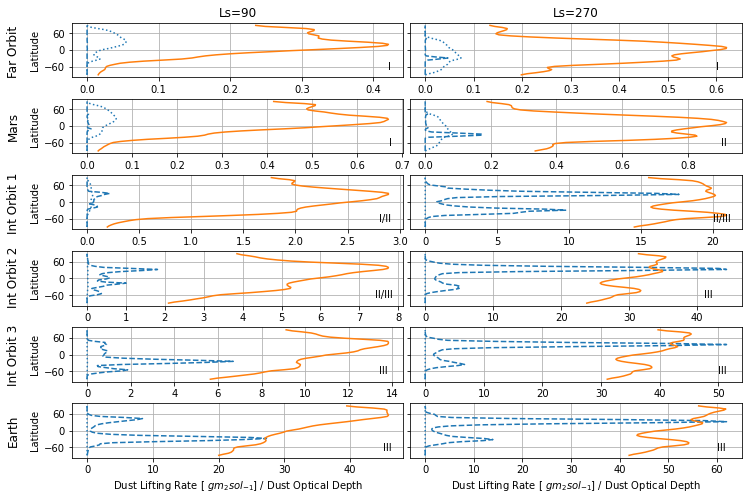

In [138]:
# Plot solsticial zonal average wind driven mass lifting rate [g/m2/sol]
#  Ls=270 pdust and mars oribt
levels1 = np.linspace(0,10,25)
levels2 = np.linspace(0,50,25)
levels3 = np.linspace(0,100,25)
level_lift=[1e-5,5e-5,1e-4,5e-4,1e-3,5e-3,1e-2,5e-2,1e-1]


varlist2 = [drs450_ls90['dst_mass_ws_source'],drs450_ls270['dst_mass_ws_source'],
            dmr_ls90['dst_mass_ws_source'],dmr_ls270['dst_mass_ws_source'],
            drs800_ls90['dst_mass_ws_source'],drs800_ls270['dst_mass_ws_source'],
            drs1000_ls90['dst_mass_ws_source'],drs1000_ls270['dst_mass_ws_source'],
            drs1200_ls90['dst_mass_ws_source'],drs1200_ls270['dst_mass_ws_source'], 
            der_ls90['dst_mass_ws_source'],der_ls270['dst_mass_ws_source']]

varlist3 = [drs450_ls90['dst_mass_dd_source'],drs450_ls270['dst_mass_dd_source'],
            dmr_ls90['dst_mass_dd_source'],dmr_ls270['dst_mass_dd_source'],
            drs800_ls90['dst_mass_dd_source'],drs800_ls270['dst_mass_dd_source'],
            drs1000_ls90['dst_mass_dd_source'],drs1000_ls270['dst_mass_dd_source'],
            drs1200_ls90['dst_mass_dd_source'],drs1200_ls270['dst_mass_dd_source'], 
            der_ls90['dst_mass_dd_source'],der_ls270['dst_mass_dd_source']]


varlist5 = [drs450_ls90['taudust_VIS'],drs450_ls270['taudust_VIS'],
            dmr_ls90['taudust_VIS'],dmr_ls270['taudust_VIS'],
            drs800_ls90['taudust_VIS'],drs800_ls270['taudust_VIS'],
            drs1000_ls90['taudust_VIS'],drs1000_ls270['taudust_VIS'],
            drs1200_ls90['taudust_VIS'],drs1200_ls270['taudust_VIS'], 
            der_ls90['taudust_VIS'],der_ls270['taudust_VIS']]



namlist = ['taudust_VIS','swflx','ts','taudust_VIS','swflx','ts']
title=['Ls=90','Ls=270']

fig, axs = py.subplots(6,2, sharey=True, figsize=(12,8))
axs = axs.ravel()
fig.subplots_adjust(wspace=0.02,hspace=0.4)
#fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
for i in range(0,12):
    
    axs[i].yaxis.set_major_locator(MultipleLocator(60))
    if i <=1:
        axs[i].set_title(str(title[i]))
    
    if i % 2 == 0:
        axs[i].set_ylabel('Latitude')
 
    axs[i].plot(varlist2[i].mean('lon')*C, DMR.lat, label='Topo', color='tab:blue', linestyle='dashed')
    axs[i].plot(varlist3[i].mean('lon')*C, DMR.lat, label='Topo', color='tab:blue', linestyle='dotted')
    axs[i].plot(varlist5[i].mean('lon'), DMR.lat, label='Topo, tau', color='tab:orange')
    axs[i].grid(b=None, which='major', axis='both')
    
    # add labels
    label = ['I','I','I','II','I/II','II/III','II/III','III','III','III','III','III']
    xval = [0.42, 0.6, 0.67, 0.9, 2.8, 20, 7.4, 41, 13.4, 50, 45, 60]
    axs[i].text(xval[i], -70, label[i], color='black')
  
    if i >= 10:
        axs[i].set_xlabel('Dust Lifting Rate [$\ gm_{2}sol_{-1}$] / Dust Optical Depth')

     
    
    #axs[i].legend(

py.gcf().text(0.05, 0.79, 'Far Orbit', fontsize=12, rotation=90)
py.gcf().text(0.05, 0.68, 'Mars', fontsize=12, rotation=90)
py.gcf().text(0.05, 0.52, 'Int Orbit 1', fontsize=12, rotation=90)
py.gcf().text(0.05, 0.39, 'Int Orbit 2', fontsize=12, rotation=90)
py.gcf().text(0.05, 0.255, 'Int Orbit 3', fontsize=12, rotation=90)
py.gcf().text(0.05,0.15, 'Earth', fontsize=12, rotation=90)

py.savefig('/Users/vhartwic/Documents/codes/VHPlots/Data/Papers/Hartwick+2022_ApJ/Figures/exomars_fig13.eps',dpi=300)

Figure 13: Solsticial zonal average dust devil (dotted) and wind stress (dashed) dust lifting rates [g/m2/sol] and the visible dust optical depth (solid orange) for more distant than present day mars (Far Orbit) to Earth orbit. Regimes are listed in the lower right corner of each panel. Note the different x axis scale.

#### Figure 14

In [143]:
# Mars Orbit, No Topo
dataDIR = '/Users/vhartwic/Documents/codes/VHPlots/Data/Papers/Hartwick+2022_ApJ/fv3_2.0_rmars/fms_mars_nocloud/NoTopo/00668.atmos_average_pstd.nc' #your file]
DMT = xr.open_dataset(dataDIR, decode_times=False)

# Intermediate 1, No Topo
dataDIR = '/Users/vhartwic/Documents/codes/VHPlots/Data/Papers/Hartwick+2022_ApJ/IntOrbits/fms_mars_nocloud_S800/NoTopo/00540.atmos_average_pstd.nc' #your file]
DET800 = xr.open_dataset(dataDIR, decode_times=False)

# Intermediate 2, No Topo
dataDIR = '/Users/vhartwic/Documents/codes/VHPlots/Data/Papers/Hartwick+2022_ApJ/IntOrbits/fms_mars_nocloud_S1000/NoTopo/00460.atmos_average_pstd.nc' #your file]
DET1000 = xr.open_dataset(dataDIR, decode_times=False)

# Intermediate 3, No Topo
dataDIR = '/Users/vhartwic/Documents/codes/VHPlots/Data/Papers/Hartwick+2022_ApJ/IntOrbits/fms_mars_nocloud_S1200/NoTopo/00400.atmos_average_pstd.nc' #your file]
DET1200 = xr.open_dataset(dataDIR, decode_times=False)

# Earth Orbit, No Topo
dataDIR = '/Users/vhartwic/Documents/codes/VHPlots/Data/Papers/Hartwick+2022_ApJ/fv3_2.1_rearth/fms_mars_nocloud/NoTopo/00360.atmos_average_pstd.nc' #your file]
DET = xr.open_dataset(dataDIR, decode_times=False)


In [146]:
# Locate cardinal seasons in each year, then concotenate and average variables over all years in each season

# Next, process solsticial average
yrs = [1,2,3,4,5]
ls90, ls180, ls270, ls0 = [], [], [], []
for i in yrs:
    loc90 = np.where(np.logical_and(DET.areo >= 360*i + 80, DET.areo <= 360*i + 100.))
    loc180 = np.where(np.logical_and(DET.areo >= 360*i + 170, DET.areo <= 360*i + 190.))
    loc270 = np.where(np.logical_and(DET.areo >= 360*i + 260, DET.areo <= 360*i + 280.))
    loc0 = np.where(np.logical_and(DET.areo >= 360*i + 350, DET.areo <= 360*(i+1) + 10.))
    
    ls90.append(loc90[0])
    ls180.append(loc180[0])
    ls270.append(loc270[0])
    ls0.append(loc0[0])
    

# take average over time (all years)
a,b,c,d = np.concatenate(ls90),np.concatenate(ls180),np.concatenate(ls270),np.concatenate(ls0)
det_ls90, det_ls180, det_ls270, det_ls0={},{},{},{}
        

det_varlist = [DET.stress, DET.dst_mass_ws_source, DET.dst_mass_dd_source, DET.taudust_VIS, DET.dst_mass_col]
for x in range(0,len(det_varlist)):
        det_ls90[format(det_varlist[x].name)]=np.mean(det_varlist[x][a,:,:],axis=0)
        det_ls180[format(det_varlist[x].name)]=np.mean(det_varlist[x][b,:,:],axis=0)
        det_ls270[format(det_varlist[x].name)]=np.mean(det_varlist[x][c,:,:],axis=0)
        det_ls0[format(det_varlist[x].name)]=np.mean(det_varlist[x][d,:,:],axis=0)

In [147]:
# process intermediary So
# Next, process solsticial average
yrs = [1,2,3,4,5]
ls90, ls270= [], []
for i in yrs:
    loc90 = np.where(np.logical_and(DMT.areo >= 360*i + 80, DMT.areo <= 360*i + 100.))
    loc270 = np.where(np.logical_and(DMT.areo >= 360*i + 260, DMT.areo <= 360*i + 280.))
    
    ls90.append(loc90[0])
    ls270.append(loc270[0])

# take average over time (all years)
a,b = np.concatenate(ls90),np.concatenate(ls270)
dmt_ls90,dmt_ls270={},{}
   
dmt_varlist = [DMT.stress, DMT.dst_mass_ws_source, DMT.dst_mass_dd_source, DMT.taudust_VIS, DMT.dst_mass_col]
for x in range(0,len(dmt_varlist)):
        dmt_ls90[format(dmt_varlist[x].name)]=np.mean(dmt_varlist[x][a,:,:],axis=0)
        dmt_ls270[format(dmt_varlist[x].name)]=np.mean(dmt_varlist[x][b,:,:],axis=0)

#S800
ls90, ls270= [], []
for i in yrs:
    loc90 = np.where(np.logical_and(DET800.areo >= 360*i + 80, DET800.areo <= 360*i + 100.))
    loc270 = np.where(np.logical_and(DET800.areo >= 360*i + 260, DET800.areo <= 360*i + 280.))
    
    ls90.append(loc90[0])
    ls270.append(loc270[0])

# take average over time (all years)
a,b = np.concatenate(ls90),np.concatenate(ls270)
det800_ls90,det800_ls270={},{}

det800_varlist = [DET800.stress, DET800.dst_mass_ws_source, DET800.dst_mass_dd_source, DET800.taudust_VIS, DET800.dst_mass_col]
for x in range(0,len(det800_varlist)):
        det800_ls90[format(det800_varlist[x].name)]=np.mean(det800_varlist[x][a,:,:],axis=0)
        det800_ls270[format(det800_varlist[x].name)]=np.mean(det800_varlist[x][b,:,:],axis=0)

#S1000
ls90, ls270= [], []
for i in yrs:
    loc90 = np.where(np.logical_and(DET1000.areo >= 360*i + 80, DET1000.areo <= 360*i + 100.))
    loc270 = np.where(np.logical_and(DET1000.areo >= 360*i + 260, DET1000.areo <= 360*i + 280.))
    
    ls90.append(loc90[0])
    ls270.append(loc270[0])

# take average over time (all years)
a,b = np.concatenate(ls90),np.concatenate(ls270)
det1000_ls90,det1000_ls270={},{}

det1000_varlist = [DET1000.stress, DET1000.dst_mass_ws_source, DET1000.dst_mass_dd_source,DET1000.taudust_VIS, DET1000.dst_mass_col]
for x in range(0,len(det1000_varlist)):
        det1000_ls90[format(det1000_varlist[x].name)]=np.mean(det1000_varlist[x][a,:,:],axis=0)
        det1000_ls270[format(det1000_varlist[x].name)]=np.mean(det1000_varlist[x][b,:,:],axis=0)

#S1200
ls90, ls270= [], []
for i in yrs:
    loc90 = np.where(np.logical_and(DET1200.areo >= 360*i + 80, DET1200.areo <= 360*i + 100.))
    loc270 = np.where(np.logical_and(DET1200.areo >= 360*i + 260, DET1200.areo <= 360*i + 280.))
    
    ls90.append(loc90[0])
    ls270.append(loc270[0])

# take average over time (all years)
a,b = np.concatenate(ls90),np.concatenate(ls270)
det1200_ls90,det1200_ls270={},{}

det1200_varlist = [DET1200.stress, DET1200.dst_mass_ws_source, DET1200.dst_mass_dd_source, DET1200.taudust_VIS, DET1200.dst_mass_col]
for x in range(0,len(det1200_varlist)):
        det1200_ls90[format(det1200_varlist[x].name)]=np.mean(det1200_varlist[x][a,:,:],axis=0)
        det1200_ls270[format(det1200_varlist[x].name)]=np.mean(det1200_varlist[x][b,:,:],axis=0)


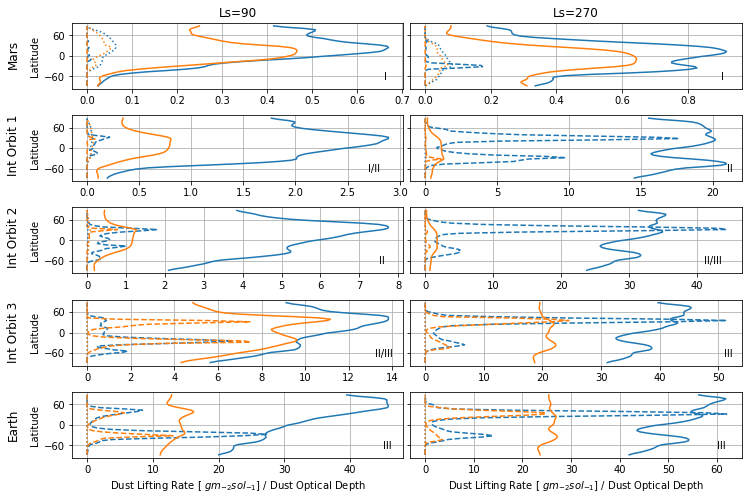

In [148]:
# Plot solsticial zonal average wind driven mass lifting rate [g/m2/sol]
#  Ls=270 pdust and mars oribt
levels1 = np.linspace(0,10,25)
levels2 = np.linspace(0,50,25)
levels3 = np.linspace(0,100,25)
level_lift=[1e-5,5e-5,1e-4,5e-4,1e-3,5e-3,1e-2,5e-2,1e-1]


varlist2 = [dmr_ls90['dst_mass_ws_source'],dmr_ls270['dst_mass_ws_source'],
            drs800_ls90['dst_mass_ws_source'],drs800_ls270['dst_mass_ws_source'],
            drs1000_ls90['dst_mass_ws_source'],drs1000_ls270['dst_mass_ws_source'],
            drs1200_ls90['dst_mass_ws_source'],drs1200_ls270['dst_mass_ws_source'], 
            der_ls90['dst_mass_ws_source'],der_ls270['dst_mass_ws_source']]

varlist = [dmt_ls90['dst_mass_ws_source'],dmt_ls270['dst_mass_ws_source'],
           det800_ls90['dst_mass_ws_source'],det800_ls270['dst_mass_ws_source'],
           det1000_ls90['dst_mass_ws_source'],det1000_ls270['dst_mass_ws_source'],
           det1200_ls90['dst_mass_ws_source'],det1200_ls270['dst_mass_ws_source'], 
           det_ls90['dst_mass_ws_source'],det_ls270['dst_mass_ws_source']]

varlist3 = [dmr_ls90['dst_mass_dd_source'],dmr_ls270['dst_mass_dd_source'],
            drs800_ls90['dst_mass_dd_source'],drs800_ls270['dst_mass_dd_source'],
            drs1000_ls90['dst_mass_dd_source'],drs1000_ls270['dst_mass_dd_source'],
            drs1200_ls90['dst_mass_dd_source'],drs1200_ls270['dst_mass_dd_source'], 
            der_ls90['dst_mass_dd_source'],der_ls270['dst_mass_dd_source']]

varlist4 = [dmt_ls90['dst_mass_dd_source'],dmt_ls270['dst_mass_dd_source'],
           det800_ls90['dst_mass_dd_source'],det800_ls270['dst_mass_dd_source'],
           det1000_ls90['dst_mass_dd_source'],det1000_ls270['dst_mass_dd_source'],
           det1200_ls90['dst_mass_dd_source'],det1200_ls270['dst_mass_dd_source'], 
           det_ls90['dst_mass_dd_source'],det_ls270['dst_mass_dd_source']]

varlist5 = [dmr_ls90['taudust_VIS'],dmr_ls270['taudust_VIS'],
            drs800_ls90['taudust_VIS'],drs800_ls270['taudust_VIS'],
            drs1000_ls90['taudust_VIS'],drs1000_ls270['taudust_VIS'],
            drs1200_ls90['taudust_VIS'],drs1200_ls270['taudust_VIS'], 
            der_ls90['taudust_VIS'],der_ls270['taudust_VIS']]

varlist6 = [dmt_ls90['taudust_VIS'],dmt_ls270['taudust_VIS'],
           det800_ls90['taudust_VIS'],det800_ls270['taudust_VIS'],
           det1000_ls90['taudust_VIS'],det1000_ls270['taudust_VIS'],
           det1200_ls90['taudust_VIS'],det1200_ls270['taudust_VIS'], 
           det_ls90['taudust_VIS'],det_ls270['taudust_VIS']]

namlist = ['taudust_VIS','swflx','ts','taudust_VIS','swflx','ts']
title=['Ls=90','Ls=270']

fig, axs = py.subplots(5,2, sharey=True,figsize=(12,8))
axs = axs.ravel()
fig.subplots_adjust(wspace=0.02,hspace=0.4)
label=['I','I','I/II','II','II','II/III','II/III','III','III','III','III']

for i in range(0,10):
    
    axs[i].yaxis.set_major_locator(MultipleLocator(60))
   

    if i <=1:
        axs[i].set_title(str(title[i]))
    
    if i % 2 == 0:
        axs[i].set_ylabel('Latitude')
 
    axs[i].plot(varlist2[i].mean('lon')*C, DMR.lat, label='Topo', color='tab:blue', linestyle='dashed')
    axs[i].plot(varlist[i].mean('lon')*C, DMR.lat, label='No Topo', color='tab:orange', linestyle='dashed')
    axs[i].plot(varlist3[i].mean('lon')*C, DMR.lat, label='Topo', color='tab:blue', linestyle='dotted')
    axs[i].plot(varlist4[i].mean('lon')*C, DMR.lat, label='No Topo', color='tab:orange', linestyle='dotted')
    axs[i].plot(varlist5[i].mean('lon'), DMR.lat, label='Topo, tau', color='tab:blue')
    axs[i].plot(varlist6[i].mean('lon'), DMR.lat, label='No Topo, tau', color='tab:orange')
    axs[i].grid(b=None, which='major', axis='both')
    
    # add labels
    xval = [0.66, 0.9, 2.7, 21, 7.5, 41, 13.2, 51, 45, 60]
    axs[i].text(xval[i], -70, label[i], color='black')
    if i >= 8:
        axs[i].set_xlabel('Dust Lifting Rate [$\ gm_{-2}sol_{-1}$] / Dust Optical Depth')


py.gcf().text(0.05, 0.805, 'Mars', fontsize=12, rotation=90)
py.gcf().text(0.05, 0.62, 'Int Orbit 1', fontsize=12, rotation=90)
py.gcf().text(0.05, 0.46, 'Int Orbit 2', fontsize=12, rotation=90)
py.gcf().text(0.05, 0.295, 'Int Orbit 3', fontsize=12, rotation=90)
py.gcf().text(0.05,0.16, 'Earth', fontsize=12, rotation=90)

py.savefig('/Users/vhartwic/Documents/codes/VHPlots/Data/Papers/Hartwick+2022_ApJ/Figures/exomars_fig14.eps',dpi=300)


Figure 14: (As in Figure 12) Solstitial zonal average dust devil (dotted) and wind stress (dashed) lifting rates [gm-2sol-1] for simulations with (blue) and without (orange) topography versus orbital radius. Solid lines show the zonal average visible dust optical depth. Regimes for the no topography simulations are listed in the lower right corner of each panel. Note that the range of the x-axis changes in each panel.

### 3.7/3.8 Simulated Spectra

#### Figure 15 : See PICASO Notebook

In [149]:
# read in PICASO wavelength grid for instrument of interest
filename = '/Users/vhartwic/Documents/codes/VHPlots/Data/Papers/Hartwick+2022_ApJ/picaso/wavelength.out'
filename2 = '/Users/vhartwic/Documents/codes/VHPlots/Data/Papers/Hartwick+2022_ApJ/picaso/alb_dmr_noaerosol_test.out'
filename3 = '//Users/vhartwic/Documents/codes/VHPlots/Data/Papers/Hartwick+2022_ApJ/picaso/alb_der_noaerosol_test.out'
surf_alb_file = '/Users/vhartwic/Documents/codes/VHPlots/Data/Papers/Hartwick+2022_ApJ/picaso/surface_albedo.out'
surf_wl_file = '/Users/vhartwic/Documents/codes/VHPlots/Data/Papers/Hartwick+2022_ApJ/picaso/surface_wl.out'

filename_alb_dmr = '/Users/vhartwic/Documents/codes/VHPlots/Data/Papers/Hartwick+2022_ApJ/picaso/alb_dmr_test.out'
filename_alb_der = '/Users/vhartwic/Documents/codes/VHPlots/Data/Papers/Hartwick+2022_ApJ/picaso/alb_der_test.out'

# define new & old wavelength grids
wl= np.loadtxt(filename)
alb_dmr_na, alb_der_na = np.loadtxt(filename2),np.loadtxt(filename3)
alb_dmr, alb_der, alb_der_ls90 = np.loadtxt(filename_alb_dmr),np.loadtxt(filename_alb_der), np.loadtxt(filename_alb_der_ls90)
surf_alb, surf_wl = np.loadtxt(surf_alb_file),np.loadtxt(surf_wl_file)

# normalize to be 1 at 1um
alb_dmr, alb_der = alb_dmr/alb_dmr[130], alb_der/alb_der[130]
alb_dmr_na, alb_der_na = alb_dmr_na/alb_dmr_na[130], alb_der_na/alb_der_na[130]
surf_alb = surf_alb/surf_alb[26]
#surf_alb = surf_alb*0.23


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


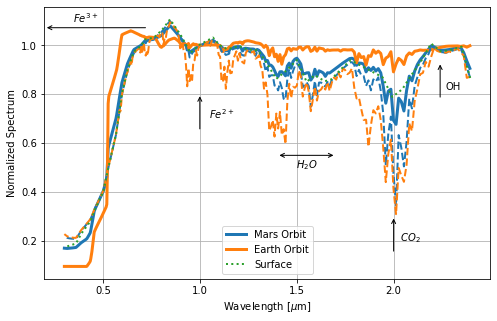

In [150]:
## Annual Average Photon Flux [umol/m2/s]
fig, axs = py.subplots(1,1, figsize=(8,5), sharey=True, sharex=True)
fig.subplots_adjust(wspace=0.05)

fig = axs.plot(wl,alb_dmr,linewidth=3,label='Mars Orbit')
axs.plot(wl, alb_der,linewidth=3, label='Earth Orbit')
axs.plot(wl,alb_dmr_na,linewidth=2,linestyle='--', color='tab:blue')
axs.plot(wl,alb_der_na,linewidth=2,linestyle='--', color='tab:orange')
axs.plot(surf_wl,surf_alb,linewidth=2,linestyle='dotted', label='Surface')
axs.set_xlabel('Wavelength [$\mu$m]')
axs.set_ylabel('Normalized Spectrum')
axs.grid(b=None, which='major', axis='both')

axs.annotate("", xy=(2, 0.3), xytext=(2, 0.15),arrowprops=dict(arrowstyle="->"))
axs.text(2.02, 0.2, '$\ CO_{2}$', color='black')

axs.annotate("", xy=(1.4, 0.55), xytext=(1.7, 0.55),arrowprops=dict(arrowstyle="<->"))
axs.text(1.48, 0.5, '$\ H_{2}O$', color='black')

axs.annotate("", xy=(0.73, 1.072), xytext=(0.2, 1.072),arrowprops=dict(arrowstyle="<-"))
axs.text(0.33, 1.092, '$\ Fe^{3+}$', color='black')

axs.annotate("", xy=(1, 0.8), xytext=(1, 0.65),arrowprops=dict(arrowstyle="->"))
axs.text(1.03, 0.7, '$\ Fe^{2+}$', color='black')

axs.annotate("", xy=(2.24, 0.93), xytext=(2.24, 0.78),arrowprops=dict(arrowstyle="->"))
axs.text(2.27, 0.82, 'OH', color='black')
py.legend(loc='lower center')

py.savefig('/Users/vhartwic/Documents/codes/VHPlots/Data/Papers/Hartwick+2022_ApJ/Figures/exomars_fig15.eps',dpi=300)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


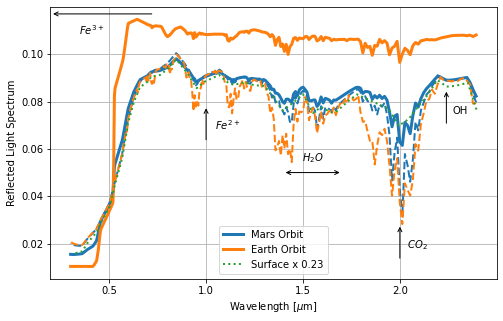

In [83]:

## Annual Average Photon Flux [umol/m2/s]
fig, axs = py.subplots(1,1, figsize=(8,5), sharey=True, sharex=True)
fig.subplots_adjust(wspace=0.05)

fig = axs.plot(wl,alb_dmr,linewidth=3,label='Mars Orbit')
axs.plot(wl, alb_der,linewidth=3, label='Earth Orbit')
axs.plot(wl,alb_dmr_na,linewidth=2,linestyle='--', color='tab:blue')
axs.plot(wl,alb_der_na,linewidth=2,linestyle='--', color='tab:orange')
axs.plot(surf_wl,surf_alb,linewidth=2,linestyle='dotted', label='Surface x 0.23')
axs.set_xlabel('Wavelength [$\mu$m]')
axs.set_ylabel('Reflected Light Spectrum')
axs.grid(b=None, which='major', axis='both')

axs.annotate("", xy=(2, 0.028), xytext=(2, 0.013),arrowprops=dict(arrowstyle="->"))
axs.text(2.02, 0.018, '$\ CO_{2}$', color='black')

axs.annotate("", xy=(1.4, 0.05), xytext=(1.7, 0.05),arrowprops=dict(arrowstyle="<->"))
axs.text(1.48, 0.055, '$\ H_{2}O$', color='black')

axs.annotate("", xy=(0.73, .117), xytext=(0.2, .117),arrowprops=dict(arrowstyle="<-"))
axs.text(0.33, .108, '$\ Fe^{3+}$', color='black')

axs.annotate("", xy=(1, 0.078), xytext=(1, 0.063),arrowprops=dict(arrowstyle="->"))
axs.text(1.03, 0.068, '$\ Fe^{2+}$', color='black')

axs.annotate("", xy=(2.24, 0.085), xytext=(2.24, 0.07),arrowprops=dict(arrowstyle="->"))
axs.text(2.27, 0.075, 'OH', color='black')
py.legend(loc='lower center')



Figure 14: Simulated planetary reflectance spectrum for a land planet with radiatively active dust at Mars orbit (orange) and Earth orbit (blue). Dashed lines show the spectrum without radiatively active dust. The dotted green line shows the surface albedo (scaled by a factor of 0.23) based on CRISM (Madden & Kaltenegger, 2018). Major absorption features are labeled. The spectral range was chosen to match LUVOIR-A.

# 4 Discussion 

### 4.1.1 Limitations due to Reduced Surface Solar Flux

#### Figure 16

2.8397443028571425e-19


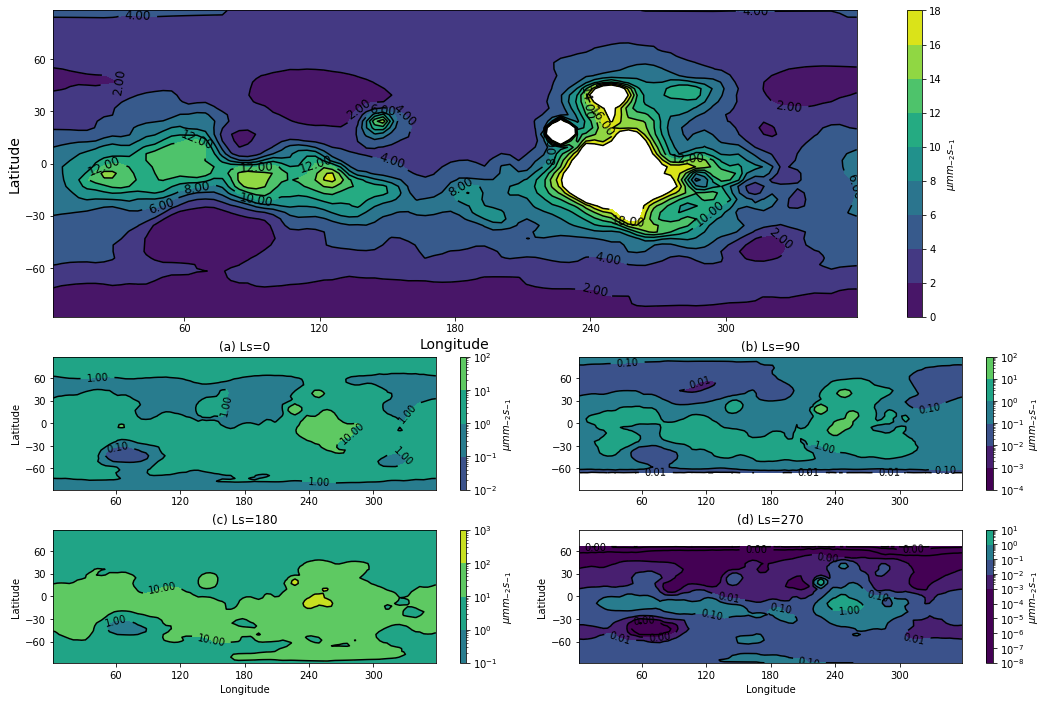

In [125]:
import matplotlib.gridspec as gridspec

from matplotlib import ticker

# calculate net change in surface dust (starting at 30 m)
level_peri = np.arange(0,5,0.1)
level_aph = np.arange(0,20,1)
varlist = [der_ls0['swflx'],der_ls90['swflx'],der_ls180['swflx'],der_ls270['swflx']]
title = ['Ls=0','Ls=90','Ls=180','Ls=270']
level_list = [np.arange(0,50,2), np.arange(0,15,1), np.arange(0,50,2), np.arange(0,2.5,0.25)]
level_list = [[0,0.01,0.1,1.,10.,100],[0,0.01,0.1,1.,10.,100],[0,0.01,0.1,1.,10.,100],[0,0.01,0.1,1.,10.,100]]
level_annual = np.arange(0,20,2)

# convert W/m2 to umol/m2/s
# E = hc/lambda (planks constant * speed of light / wavelength)
h = 6.62607004e-34 #m2kg/s
c = 3e8 #m/s
avg = 6.022e23
umol = 1.660538863127E18
wavelength = 700 #635 # nm
tmp = np.mean(DER.swflx[67:140,:,:],axis=0)   # [W/m2] == [kgm2/s2/m2] * m * [s/m] * [s/m2kg] --> [kgm2] * [s2/m2kg] = [photons s2 /m2]
tmp2 = h*c/(wavelength*1e-9)
print(tmp2)
tmp = (tmp / tmp2) # photons/m2/s
tmp = (tmp/avg) # mole/m2/s
tmp = tmp*1e6 #umol/m2/s

fig, axs = py.subplots(4,2, sharey=True, figsize=(18,12)) # define number of rows, columns
fig.subplots_adjust(wspace=0.1, hspace=0.3)

gs = gridspec.GridSpec(4,2) # define grid matching number of rows, columns
ax1 = py.subplot(gs[:2,0:2]) # define size of each panel row x column
ax2 = py.subplot(gs[2,0])
ax3 = py.subplot(gs[2,1])
ax4 = py.subplot(gs[3,0])
ax5 = py.subplot(gs[3,1])

# panel a - Annual average
fig = ax1.contourf(DER.lon, DER.lat, tmp, cmap=py.cm.viridis,levels=level_annual)
ax1.yaxis.set_major_locator(MultipleLocator(30))
ax1.xaxis.set_major_locator(MultipleLocator(60))
py.colorbar(fig,ax=ax1,label='$\mu m m_{-2}s_{-1}$')
fig = ax1.contour(DER.lon, DER.lat, tmp, colors='k', levels=level_annual)
py.clabel(fig, fontsize=12,inline=1, colors='black', fmt='%1.2f')
ax1.set_xlabel('Longitude', fontsize=14)
ax1.set_ylabel('Latitude',fontsize=14)

# panel b - Ls=0
ax2.yaxis.set_major_locator(MultipleLocator(30))
ax2.xaxis.set_major_locator(MultipleLocator(60))
ax2.set_title('(a) Ls=0')
tmp = (varlist[0]/tmp2)*(1e6/avg)
norm= matplotlib.colors.LogNorm(vmin=1e-3, vmax=1e3)
fig = ax2.contourf(DER.lon, DER.lat, varlist[0]/tmp2 * (1e6/avg), locator=ticker.LogLocator(base=10,subs=[1]), norm=norm,cmap=py.cm.viridis)
py.colorbar(fig,ax=ax2,label='$\mu m m_{-2}s_{-1}$')
fig = ax2.contour(DER.lon, DER.lat, varlist[0]/tmp2 * (1e6/avg), colors='k',locator=ticker.LogLocator(subs=range(1,2)),norm=norm )
py.clabel(fig, fontsize=10,inline=1, colors='black', fmt='%1.2f')
ax2.set_ylabel('Latitude')

# panel b - Ls=90
ax3.yaxis.set_major_locator(MultipleLocator(30))
ax3.xaxis.set_major_locator(MultipleLocator(60))
ax3.set_title('(b) Ls=90')
tmp = (varlist[1]/tmp2)*(1e6/avg)
norm= matplotlib.colors.LogNorm(vmin=1e-3, vmax=1e3)
fig = ax3.contourf(DER.lon, DER.lat, varlist[1]/tmp2 * (1e6/avg), locator=ticker.LogLocator(base=10,subs=[1]), norm=norm,cmap=py.cm.viridis)
py.colorbar(fig,ax=ax3,label='$\mu m m_{-2}s_{-1}$')
fig = ax3.contour(DER.lon, DER.lat, varlist[1]/tmp2 * (1e6/avg), colors='k',locator=ticker.LogLocator(subs=range(1,2)),norm=norm )
py.clabel(fig, fontsize=10,inline=1, colors='black', fmt='%1.2f')

# panel c - Ls=180
ax4.yaxis.set_major_locator(MultipleLocator(30))
ax4.xaxis.set_major_locator(MultipleLocator(60))
ax4.set_title('(c) Ls=180')
tmp = (varlist[2]/tmp2)*(1e6/avg)
norm= matplotlib.colors.LogNorm(vmin=1e-3, vmax=1e3)
fig = ax4.contourf(DER.lon, DER.lat, varlist[2]/tmp2 * (1e6/avg), locator=ticker.LogLocator(base=10,subs=[1]), norm=norm,cmap=py.cm.viridis)
py.colorbar(fig,ax=ax4,label='$\mu m m_{-2}s_{-1}$')
fig = ax4.contour(DER.lon, DER.lat, varlist[2]/tmp2 * (1e6/avg), colors='k',locator=ticker.LogLocator(subs=range(1,2)),norm=norm )
py.clabel(fig, fontsize=10,inline=1, colors='black', fmt='%1.2f')
ax4.set_ylabel('Latitude')
ax4.set_xlabel('Longitude')
      
# panel d - Ls=270
ax5.yaxis.set_major_locator(MultipleLocator(30))
ax5.xaxis.set_major_locator(MultipleLocator(60))
ax5.set_title('(d) Ls=270')
tmp = (varlist[3]/tmp2)*(1e6/avg)
norm= matplotlib.colors.LogNorm(vmin=1e-3, vmax=1e3)
fig = ax5.contourf(DER.lon, DER.lat, varlist[3]/tmp2 * (1e6/avg), locator=ticker.LogLocator(base=10,subs=[1]), norm=norm,cmap=py.cm.viridis)
py.colorbar(fig,ax=ax5,label='$\mu m m_{-2}s_{-1}$')
fig = ax5.contour(DER.lon, DER.lat, varlist[3]/tmp2 * (1e6/avg), colors='k',locator=ticker.LogLocator(subs=range(1,2)),norm=norm )
py.clabel(fig, fontsize=10,inline=1, colors='black', fmt='%1.2f')
ax5.set_ylabel('Latitude')
ax5.set_xlabel('Longitude')

py.savefig('/Users/vhartwic/Documents/codes/VHPlots/Data/Papers/Hartwick+2022_ApJ/picasexomars_fig16.eps',dpi=300)

Figure 15: Annual and seasonal average surface photon flux [µmolm-2s-1]. The minimum flux rate for photosynthetic life is approximately 0.01 µmolm-2s-1. Note the change in contour scales. The white regions in the first plot have photon flux values greater than 18 µmolm-2s-1. 

# 4.2 Remaining Uncertainties

#### Figure 17

In [72]:
# change [kg/m2] = original - total lifted + total deposited
# deposition rate = change - origianl + lifted
#Dust_surf (t) = dust_surf0 - Dust_mass_source(t) x t + Dust_sedim(t) x t, t = 5 * 88775
# dst_mass_surf = dust_surf0 - dst_mass_source * timevar + dust_sedim * timevar

# to find the change in surface dust mass per timestep need to calculate the difference
# between dst_mass_surf at each step, subtracting dust_surf0 gives the total difference 
# since the start of the simulation 
dust_surf0=30
change = DER.dst_mass_surf - dust_surf0
change.load()
change[1:,:,:]=0.0

for i in range(1,len(DER.time)):
    change[i,:,:]=DER.dst_mass_surf[i]-DER.dst_mass_surf[i-1]
    
# change[kg/m2] = sedim * t - excavation*t
#sedim [kg/m2/s] = (change + excavation*t)/t
#der_dst_sedim = (change + DER.dst_mass_source * timevar)/timevar
timevar = 5 * 88775
der_dst_sedim = (change + DER.dst_mass_source*timevar)/timevar

# change to reservoir depth [mm]
# change from original (+ dust deposited, - dust lifted)
rho_dust = 2000 #[kg/m3]
dust_surf0 = 30.0
der_change = DER.dst_mass_surf -  dust_surf0 

# change to depth in meters by multiplying by dust density (3000 kg/m3)
rho_dust = 2000 #[kg/m3]
der_change = der_change * (1/rho_dust)

der_change_yr1 = der_change[72,:,:]
der_change_yr2 = (DER.dst_mass_surf[139,:,:]-DER.dst_mass_surf[72,:,:])*(1./rho_dust)
der_change_yr3 = (DER.dst_mass_surf[211,:,:]-DER.dst_mass_surf[139,:,:])*(1./rho_dust)
der_change_yr4 = (DER.dst_mass_surf[283,:,:]-DER.dst_mass_surf[211,:,:])*(1./rho_dust)
der_change_yr5 = (DER.dst_mass_surf[359,:,:]-DER.dst_mass_surf[283,:,:])*(1./rho_dust)


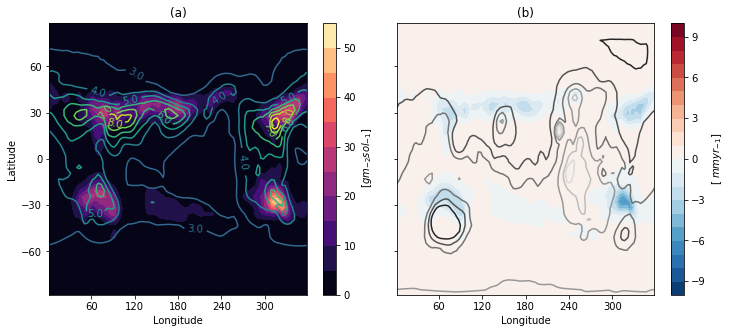

In [73]:
# calculate net change in surface dust (starting at 30 kg/m2)
level= [-0.07,-0.06,-0.05,-0.04,-0.03,-0.02,-0.01,0,0.01,0.02,0.03,0.04,0.05,0.06,0.07]
level=[-0.075,-0.05,-0.025,-0.02,-0.015,-0.01,-0.005,0,0.005,0.01,0.02,0.025,0.05,0.075]
level=np.arange(-10,12.5,2.5)
level = np.arange(-10,11,1)

sedim_lev = np.arange(0,1.2e-7,0.1e-7)
exc_lev = np.arange(0,5e-7,0.5e-7)

sedim_lev = np.arange(0,10,1)
exc_lev = np.arange(0,60,5)

fig, (ax1,ax2) = py.subplots(1,2, figsize=(12,5), sharey=True, sharex=True)
fig.subplots_adjust(wspace=0.08,hspace=0.08)
ax1.yaxis.set_major_locator(MultipleLocator(30))
ax1.xaxis.set_major_locator(MultipleLocator(60))

# Excavation Rate (ignore first year)
ax1.set_ylabel('Latitude')
ax1.set_xlabel('Longitude')
ax1.set_title('(a)')
#fig1 = ax1.contourf(DER.lon, DER.lat, topo, cmap=py.cm.Greys_r)
fig1 = ax1.contourf(DER.lon, DER.lat, DER.dst_mass_source[73:,:,:].mean('time')*C, cmap=py.cm.magma,levels=exc_lev)
fig2 =ax1.contour(DER.lon, DER.lat, der_dst_sedim[73:,:,:].mean('time')*C, cmap=py.cm.viridis,levels=sedim_lev)
py.clabel(fig2, fontsize=10,inline=1,fmt='%1.1f')
py.colorbar(fig1,ax=ax1,label='$\ [gm_{-2}sol_{-1}]$')


# Net (ignore first year)
ax2.set_title('(b)')
ax2.set_xlabel('Longitude')
fig2 = ax2.contourf(DER.lon, DER.lat, (der_change_yr2+der_change_yr3+der_change_yr4+der_change_yr5)*1000/5, cmap=py.cm.RdBu_r,levels=level)
ax2.contour(DER.lon, DER.lat, topo, cmap=py.cm.Greys_r)
py.colorbar(fig2,ax=ax2,label='[$\ mmyr_{-1}$]')

py.savefig(f'{PATH}/exomars_fig17.eps',dpi=300)



Figure 17: (a) annual average excavation (filled contours) and sedimentation (contour lines) rates [g/m2/sol] and (b) average annual change to dust surface reservoir depth [mm]. Grey contour lines in plot b show the surface topography. Sedimentation rates fall beteween 0 and 9 g/m2/sol with 1 g/m2/sol intervals